![Best Selling Games - Market Segmentation](./images/img_1.png)

## Problem Statement

The video gaming industry is rapidly evolving while the big names of the industry fighting to bring emersive experince to players utilizing the compatibility of advanced hardware and with the power of AI. Meantime Indie game developers are trying to capture a fair share of the market by introducing games with rich stories and with novel approaches. With thousands of titles released each year across various platforms. For developers, publishers, and market analysts, understanding what emphasize best-selling games is crucial for informed decision-making and strategic planning.

**This project aims to segment best-selling games on the Steam platform using advanced clustering techniques.** By analyzing a comprehensive dataset of top-selling Steam games, the **goal is to uncover distinct profiles or clusters that characterize successful titles**. These insights can help stakeholders:
```
- Identify key features and tags associated with high-performing games.
- Understand market trends and audience preferences.
- Inform game development, marketing, and investment strategies.
```
The analysis will be done with unsupervised learning methods, including K-Means and DBSCAN clustering, to group games based on their attributes and performance metrics. The resulting clusters will be profiled to extract meaningful patterns, offering practical recommendations for industry participants seeking to replicate or understand commercial success in the gaming sector.


In [103]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [104]:
df = pd.read_csv('./data/bestSelling_games.csv')
df.head()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
0,Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French, German, Hungarian, Italian, Japanese, Korean, Norwegian, Polish, Portuguese - Portugal, Portuguese - Brazil, Romanian, Russian, Simplified Chinese, Spanish - Spain, Swedish, Thai, Traditional Chinese, Turkish, Bulgarian, Ukrainian, Greek, Spanish - Latin America, Vietnamese, Indonesian",0.00,"Cross-Platform Multiplayer, Steam Trading Cards, Steam Workshop, In-App Purchases, Stats, Remote Play on Phone, Remote Play on Tablet, Remote Play on TV, Steam Timeline",17,3.20,4,80,306170000
1,PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, German, Spanish - Spain, Arabic, Japanese, Polish, Portuguese - Portugal, Russian, Turkish, Thai, Italian, Portuguese - Brazil, Traditional Chinese, Ukrainian",0.00,"Online PvP, Stats, Remote Play on Phone, Remote Play on Tablet",13,3.10,4,73,162350000
2,ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Spanish - Spain, Arabic, Korean, Polish, Portuguese - Brazil, Russian, Simplified Chinese, Spanish - Latin America, Thai, Traditional Chinese",25.99,"Single-player, Online Co-op, Steam Achievements, Steam Cloud, Family Sharing",17,3.96,4,50,840000
3,The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutch, Greek, French, German, Danish, Finnish, Hungarian, Japanese, Korean, Norwegian, Polish, Portuguese - Brazil, Portuguese - Portugal, Russian, Simplified Chinese, Spanish - Latin America, Swedish, Thai, Traditional Chinese, Turkish, Croatian",59.99,"Single-player, Steam Achievements, Steam Trading Cards, Steam Cloud, Remote Play on TV, Family Sharing",17,4.10,3,24,2000000
4,Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, Shooter, Sandbox",win,"English, French, Italian, German, Spanish - Spain, Japanese, Korean, Polish, Portuguese - Portugal, Russian, Simplified Chinese, Spanish - Latin America, Traditional Chinese",59.99,"Single-player, Online PvP, Online Co-op, Steam Achievements, In-App Purchases, Remote Play on Phone, Remote Play on Tablet",17,4.32,3,80,21610000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_name            2380 non-null   object 
 1   reviews_like_rate    2380 non-null   int64  
 2   all_reviews_number   2380 non-null   int64  
 3   release_date         2380 non-null   object 
 4   developer            2380 non-null   object 
 5   user_defined_tags    2380 non-null   object 
 6   supported_os         2380 non-null   object 
 7   supported_languages  2380 non-null   object 
 8   price                2380 non-null   float64
 9   other_features       2380 non-null   object 
 10  age_restriction      2380 non-null   int64  
 11  rating               2380 non-null   float64
 12  difficulty           2380 non-null   int64  
 13  length               2380 non-null   int64  
 14  estimated_downloads  2380 non-null   int64  
dtypes: float64(2), int64(6), object(7)
mem

In [106]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe(include='all')


,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
count,2380,"2,380.00","2,380.00",2380,2380,2380,2380,2380,"2,380.00",2380,"2,380.00","2,380.00","2,380.00","2,380.00","2,380.00"
unique,2380,NaN,NaN,1511,1806,1649,6,1606,NaN,761,NaN,NaN,NaN,NaN,NaN
top,UBERMOSH:OMEGA,NaN,NaN,"22 May, 2025",Valve,"Simulation, Management",win,English,NaN,"Single-player, Steam Achievements, Steam Cloud, Family Sharing",NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,15,17,29,1724,323,NaN,275,NaN,NaN,NaN,NaN,NaN
mean,NaN,82.41,"31,615.08",NaN,NaN,NaN,NaN,NaN,10.51,NaN,10.61,3.23,2.86,22.97,"2,523,006.58"
std,NaN,12.64,"213,719.68",NaN,NaN,NaN,NaN,NaN,11.34,NaN,6.40,0.77,0.98,21.25,"11,182,829.61"
min,NaN,20.00,10.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.39,1.00,1.00,90.00
25%,NaN,76.00,342.00,NaN,NaN,NaN,NaN,NaN,2.99,NaN,10.00,2.75,2.00,6.00,"35,000.00"
50%,NaN,85.00,"2,106.50",NaN,NaN,NaN,NaN,NaN,7.99,NaN,13.00,3.38,3.00,16.00,"217,150.00"
75%,NaN,92.00,"13,030.00",NaN,NaN,NaN,NaN,NaN,12.49,NaN,17.00,3.81,3.00,34.00,"1,380,000.00"


## Dataset Overview

This dataset is retrived from kaggle: [Best-Selling Steam Games of All Time](https://www.kaggle.com/datasets/hbugrae/best-selling-steam-games-of-all-time)

This dataset contains information about **2,380 best-selling games on Steam**, it offers comprehensive look into various aspects of each game. It includes both quantitative and qualitative features, which gives a good foundation for analysis.

---

#### Key numerical features include:

+ `reviews_like_rate`: The percentage of positive reviews, ranging from 20% to a perfect 100%, with an average of approximately 82.41%.
    * According to Kaggle Dataset documentation:
    > reviews_like_rate: The recommendation rate from user reviews on Steam (e.g., '95% of the 100 reviews are positive').

* `all_reviews_number`: The total number of reviews, which varies widely from 10 to over 8.8 million, emphasizing a significant variation in player engagement.

+ `price`: Game prices range from free (0.00) up to 79.99, with an average price of around 10.51, suggest that there could be a  diverse pricing strategy among best-selling titles.
    * According to Kaggle Dataset documentation:
    > price: The price of the game. Note: The currency is MENA - U.S. Dollar, a regional price for the Middle East & North Africa, not the standard USD. A value of 0 in this column indicates the game is 'Free to Play'.

* `estimated_downloads`: Ranging from a mere 90 to an whopping 306 million, this feature highlights the massive difference in market penetration among these games.

* `age_restriction`: With values from 0 to 17, this indicates the recommended age for players.
    * According to Kaggle Dataset documentation:
    > age_restriction: The recommended age restriction for the game's content, encoded as follows: 0 (Everyone), 10 (10+), 13 (13+), 17 (17+).

+ `difficulty`: A numerical rating from 1 to 5, providing insight into the perceived challenge of the games, averaging around 2.86.
    * According to Kaggle Dataset documentation:
    > difficulty: An estimated difficulty of the game as perceived by players, on a scale of 1 to 5, where 1 is the easiest and 5 is the hardest.

+ `length`: Represents the estimated playtime in hours, varying from 1 to 80 hours.
    * According to the Kaggle Dataset documentation:
    > length: The average time (in hours) players spend to complete or fully experience the game. For this dataset, the value is capped at a maximum of 80 hours.

+ `rating`: An average rating score ranging from 0.39 to 4.83.
    * According to the Kaggle Dataset documentation:
    > rating: An overall user-provided rating for the game on a scale of 1 to 5, where 1 is the lowest and 5 is the highest.

---

#### Categorical and textual features provide additional context:

* `game_name`: Unique identifiers for each game.

* `release_date`: The date the game was released, which will be crucial for calculating *game age*.

* `developer`: The studio responsible for the game, with 1806 unique developers in the dataset.

* `user_defined_tags`: A critical field containing multiple descriptive tags (e.g., 'FPS', 'Action', 'Tactical'), *which will require parsing for genre analysis*.

* `supported_os`: Indicates the operating systems supported (e.g., 'win', 'linux'), with 'win' being the most common.

* `supported_languages`: The languages supported by the game, with English being the most frequent.

* `other_features`: Lists additional functionalities like multiplayer options or Steam achievements.

The dataset contains **no missing values**, which simplifies the initial cleaning process.

## 1. Data Cleaning & Pre-processing
> In this step, we check for null / inconsistent values, that might deviate or effect on the clustering process

In [107]:
# Check for null values
null_counts = df.isnull().sum()
print("Null values per column:")
print(null_counts[null_counts > 0])

# Check for inconsistent values (example: empty strings in object columns)
inconsistent = {}
for col in df.select_dtypes(include='object').columns:
    empty_count = (df[col].astype(str).str.strip() == '').sum()
    if empty_count > 0:
        inconsistent[col] = empty_count

if inconsistent:
    print("\nColumns with empty string values:")
    for col, count in inconsistent.items():
        print(f"{col}: {count} empty values")
else:
    print("\nNo empty string values found in object columns.")

Null values per column:
Series([], dtype: int64)

No empty string values found in object columns.


No Null or NaN values found on each column. Therefore no need of applying imputation

## 2. Feature Engineering
To get the most out of our dataset, we will create new, more informative features from the existing ones.

Genre & Tag Processing: The user_defined_tags column is a text field containing multiple tags. We will parse this field to extract the most frequent and relevant tags (e.g., 'Indie', 'Action', 'RPG') and convert them into binary features (One-Hot Encoding).

Create 'Game Age': Using the converted release_date column, we will calculate the age of each game in years. This can be a powerful feature for segmentation.

Create 'Review Ratio': We can create a more robust popularity metric by combining the like rate and the total number of reviews (e.g: reviews_like_rate * all_reviews_number).

Create 'Downloads Per Year': We can use this composite feature to gain insight of  game's popularity relative to its time on the market. (e.g: estimated_downloads / (Game Age + 1) ).

In [108]:
# Genre & Tag Processing: Extract and One-Hot Encode the most frequent tags
# First, get all unique tags
all_tags = df['user_defined_tags'].str.split(', ').explode()
# Get all tags
top_tags = all_tags.value_counts().index.tolist()

## print top_tags with count
print("All Tags and their counts:")
tag_counts = all_tags.value_counts()
most_frequent_tags = list(tag_counts.items())
tag_freq_df = pd.DataFrame(most_frequent_tags, columns=['tag_name', 'count'])
display(tag_freq_df)

All Tags and their counts:


,tag_name,count
0,Simulation,736
1,Action,730
2,Adventure,522
3,RPG,437
4,Strategy,353
5,2D,308
6,Horror,299
7,FPS,246
8,Survival,237
9,Open World,236


> Data inconsistency at user_defined_tags found, marked on below image. following measures will be taken to fix the data
* find the original df records with the user_defined_tags having issue
* update the values manually, to adhere the above string split logic based on comma separtion

![Data inconsistency at user_defined_tags](./images/img_2.png)

In [109]:
# Explode the 'user_defined_tags' column into separate rows for each tag
exploded_tags_df = df['user_defined_tags'].str.split(', ').explode().to_frame(name='tag_name')
exploded_tags_df['original_df_index'] = exploded_tags_df.index

# Clean up tags: strip leading/trailing whitespace and remove any empty strings
# exploded_tags_df['tag_name'] = exploded_tags_df['tag_name'].str.strip()
# exploded_tags_df = exploded_tags_df[exploded_tags_df['tag_name'] != '']

# Get the occurrence count for each unique tag from the cleaned list
tag_counts = exploded_tags_df['tag_name'].value_counts()

# Print total unique tags
print(f"\nTotal unique tags after cleaning: {len(tag_counts)}")

#Identify tags that appear only once
single_occurrence_tags = tag_counts[tag_counts == 1].index.tolist()

print(f"\nNumber of tags appearing only once: {len(single_occurrence_tags)}")

#Create a dictionary to store original df row index(s) for each single-occurrence tag
single_tag_records = {}

# Iterate through the single occurrence tags and find their original DataFrame row indices
for tag in single_occurrence_tags:
    # Find all entries in the exploded DataFrame that match this tag
    # and get their unique original DataFrame indices
    original_indices = exploded_tags_df[exploded_tags_df['tag_name'] == tag]['original_df_index'].unique().tolist()
    single_tag_records[tag] = original_indices

print("\nOriginal DataFrame row index(es) for tags that appear only once:")
for tag, indices in single_tag_records.items():
    # Print the tag and its corresponding original DataFrame row indices
    print(f"Tag: '{tag}', Original Row Index(es): {indices}")

# Create a DataFrame from the single_tag_records for better viewing
single_tag_records_df = pd.DataFrame([
    {'tag_name': tag, 'original_df_indices': indices}
    for tag, indices in single_tag_records.items()
])
print("\nDataFrame of Single-Occurrence Tags and their Original Row Indices:")
display(single_tag_records_df)


Total unique tags after cleaning: 48

Number of tags appearing only once: 6

Original DataFrame row index(es) for tags that appear only once:
Tag: 'FPS ,RPG', Original Row Index(es): [132]
Tag: 'Adventure ,RPG', Original Row Index(es): [163]
Tag: 'Simulation,', Original Row Index(es): [664]
Tag: '', Original Row Index(es): [807]
Tag: 'Tactical,', Original Row Index(es): [1427]
Tag: 'RPG,', Original Row Index(es): [2135]

DataFrame of Single-Occurrence Tags and their Original Row Indices:


,tag_name,original_df_indices
0,"FPS ,RPG",[132]
1,"Adventure ,RPG",[163]
2,"Simulation,",[664]
3,,[807]
4,"Tactical,",[1427]
5,"RPG,",[2135]


In [110]:
# indices_to_check add the indeces from original_df_indices
indices_to_check = [163, 132, 664, 807, 1427, 2135] 

for idx in indices_to_check:
    print(f"Index: {idx}, User-defined-tags: {df.loc[idx, 'user_defined_tags']}")
    print('-' * 60)

Index: 163, User-defined-tags: Combat, Action, Adventure ,RPG
------------------------------------------------------------
Index: 132, User-defined-tags: Survival, Open World, Crafting, Building, FPS ,RPG
------------------------------------------------------------
Index: 664, User-defined-tags: Sports, Strategy, Simulation,
------------------------------------------------------------
Index: 807, User-defined-tags: Strategy, Fantasy, RPG, Turn-Based, 
------------------------------------------------------------
Index: 1427, User-defined-tags: Strategy, Turn-Based, Tactical,
------------------------------------------------------------
Index: 2135, User-defined-tags: Action, Adventure, RPG,
------------------------------------------------------------


### Making a copy of the original data frame, to preserve original data set.
+ From this point forward, we will be using a copy of the original data frame and make changes on it, such as..
    * clean inconsistent `user_defined_tags` values and add make them add back into correct tags 
    * change `release_date` data type into `date time`
    * generate a new column `game age` based on `release date`
        > Create 'Game Age': Calculate the age of each game in years
    * Genre & Tag Processing: One-Hot Encode the most frequent tags based on `user_defined_tags` column values
        > introduce new columns with boolean data type for each frequently used tag  
    * Supported OS Processing: One-Hot Encode the most frequent OS based on `supported_os` column values
        > introduce new columns with boolean data type for each frequently used OS
    * Supported Language Processing: One-Hot Encode the most frequent languages based on `supported_languages` column values
        > introduce new columns with boolean data type for each frequently used language    
    * Futher Investigate on `other_feature` column : to decide one from following options
        * > Implement new columns for most frequent values, as boolean
        * > If no significant impact on cluster analysis, drop the column


In [111]:
# make a copy of the original DataFrame to avoid modifying it directly
df_copy = df.copy()


In [112]:
# manually fixing the user_defined_tags for specific indices

df_copy.at[163, 'user_defined_tags'] = 'Combat, Action, Adventure, RPG'
df_copy.at[132, 'user_defined_tags'] = 'Survival, Open World, Crafting, Building, FPS, RPG'
df_copy.at[664, 'user_defined_tags'] = 'Sports, Strategy, Simulation'
df_copy.at[807, 'user_defined_tags'] = 'Strategy, Fantasy, RPG, Turn-Based'
df_copy.at[1427, 'user_defined_tags'] = 'Strategy, Turn-Based, Tactical'
df_copy.at[2135, 'user_defined_tags'] = 'Action, Adventure, RPG'

# confirming fix worked

# Get the refined list of user-defined tags
all_tags = df_copy['user_defined_tags'].str.split(', ').explode()
top_tags = all_tags.value_counts().index.tolist()

# Limit tags to the top 10 most frequent
top_tags = top_tags[:10]

## print tags with refined count
print("Tags and their refined counts:")
tag_counts = all_tags.value_counts()
most_frequent_tags = list(tag_counts.items())
tag_freq_df = pd.DataFrame(most_frequent_tags, columns=['tag_name', 'count'])
display(tag_freq_df)

Tags and their refined counts:


,tag_name,count
0,Simulation,737
1,Action,730
2,Adventure,523
3,RPG,440
4,Strategy,353
5,2D,308
6,Horror,299
7,FPS,247
8,Survival,237
9,Open World,236


### Create `Game Age` Feature

In [113]:
# Ensure 'release_date' is datetime
if not np.issubdtype(df_copy['release_date'].dtype, np.datetime64):
    df_copy['release_date'] = pd.to_datetime(df_copy['release_date'])

# Create 'Game Age': Calculate the age of each game in years
current_year = pd.to_datetime('today').year
df_copy['game_age'] = current_year - df_copy['release_date'].dt.year

### Create `Genre Tag` Columns for each value from `user_defined_tags`

In [114]:
# Genre & Tag Processing: One-Hot Encode the most frequent 10 tags
for tag in top_tags:
    col_name = f'tag_{tag.replace(" ", "_").replace("-", "_")}'
    if col_name not in df.columns:
        df_copy[col_name] = df_copy['user_defined_tags'].apply(lambda x: 1 if tag in x else 0)

In [115]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   game_name            2380 non-null   object        
 1   reviews_like_rate    2380 non-null   int64         
 2   all_reviews_number   2380 non-null   int64         
 3   release_date         2380 non-null   datetime64[ns]
 4   developer            2380 non-null   object        
 5   user_defined_tags    2380 non-null   object        
 6   supported_os         2380 non-null   object        
 7   supported_languages  2380 non-null   object        
 8   price                2380 non-null   float64       
 9   other_features       2380 non-null   object        
 10  age_restriction      2380 non-null   int64         
 11  rating               2380 non-null   float64       
 12  difficulty           2380 non-null   int64         
 13  length               2380 non-nul

### Create `Review Ratio` column

In [116]:
# Create 'Review Ratio': reviews_like_rate * all_reviews_number
df_copy['review_ratio'] = df_copy['reviews_like_rate'] * df_copy['all_reviews_number']

### Create `downloads_per_year` column

In [117]:
# Create 'downloads_per_year'
df_copy['downloads_per_year'] = df_copy['estimated_downloads'] / (df_copy['game_age'] + 1)

### Further Investigating `supported_os`, `supported_languages`, `other_features` value columns

In [118]:
# Display the most frequent values for each column
print("Top 10 Supported OS values:")
print(df_copy['supported_os'].value_counts().head(10))

print("\nTop 10 Supported Languages values:")
print(df_copy['supported_languages'].value_counts().head(10))

print("\nTop 10 Other Features values:")
print(df_copy['other_features'].value_counts().head(10))

Top 10 Supported OS values:
supported_os
win                  1724
win, mac, linux       307
win, mac              288
win, linux             59
win, linux, music       1
win, mac, linux,        1
Name: count, dtype: int64

Top 10 Supported Languages values:
supported_languages
English                                                                                                                                               323
English, Japanese, Simplified Chinese                                                                                                                  52
English, Russian                                                                                                                                       25
English, Simplified Chinese                                                                                                                            24
English, Japanese                                                                                        

In [119]:
#List all unique values in 'supported_os' and their counts
all_features = df_copy['supported_os'].dropna().str.split(',').explode().str.strip()
top_features = all_features.value_counts()

print("supported_os with counts:")
top_features_list = list(top_features.items())
tag_freq_df = pd.DataFrame(top_features_list, columns=['supported_os', 'count'])
display(tag_freq_df)

supported_os with counts:


,supported_os,count
0,win,2380
1,mac,596
2,linux,368
3,music,1
4,,1


> since `supported_os` value `win` having in each row, and failry  less amount of rows having other values. this columns will not be taken into cosideration. 
* `supported_os` column will be dropped from the data frame.

In [120]:
# List all unique values in 'supported_languages' and their counts
all_features = df_copy['supported_languages'].dropna().str.split(',').explode().str.strip()
top_features = all_features.value_counts().head(15)

print("supported_languages with counts:")
top_features_list = list(top_features.items())
tag_freq_df = pd.DataFrame(top_features_list, columns=['supported_languages', 'count'])
display(tag_freq_df)

supported_languages with counts:


,supported_languages,count
0,English,2380
1,German,1717
2,French,1684
3,Simplified Chinese,1595
4,Spanish - Spain,1582
5,Japanese,1506
6,Russian,1501
7,Italian,1314
8,Portuguese - Brazil,1233
9,Korean,1217


> since `supported_languages` value `English` having in each row, no point of making a boolean field for it. And rest of the languages will not take into consideration. 
* `supported_languages` this column will be dropped from the data frame

In [121]:
#List all unique values in 'other_features' and their counts
all_features = df_copy['other_features'].dropna().str.split(',').explode().str.strip()
top_features = all_features.value_counts().head(15)

print("other_features with counts:")
top_features_list = list(top_features.items())
tag_freq_df = pd.DataFrame(top_features_list, columns=['other_features', 'count'])
display(tag_freq_df)

other_features with counts:


,other_features,count
0,Single-player,2206
1,Family Sharing,2136
2,Steam Achievements,1780
3,Steam Cloud,1325
4,Steam Trading Cards,843
5,Online Co-op,516
6,Online PvP,459
7,Steam Workshop,230
8,Steam Leaderboards,230
9,In-App Purchases,224


> `other_features` column will not take into consideration for the analysis. As of it shows some of the features that provided by steam. 

### Remove unwanted columns
+ following columns will be removed from the DataFrame, since we engineered new columns based on following columns, we will no longer use original columns for our analysis
    * `reviews_like_rate`
    * `all_reviews_number`
    * `release_date`
    * `other_features`
    * `estimated_downloads`
    * `supported_os`
    * `supported_language`


In [122]:

# Clean / Remove unwanted columns from the df_copy
columns_to_remove = ['reviews_like_rate', 'all_reviews_number', 'release_date','other_features', 'estimated_downloads','supported_os', 'supported_languages']
df_copy.drop(columns=columns_to_remove, inplace=True, errors='ignore')


In [123]:
# Exclude columns containing the pattern 'tag' for brevity
# This will help in focusing on the main features without the extensive tag columns
excluded_pattern = 'tag'
columns_excluded = [col for col in df_copy.columns if excluded_pattern not in col]
print(set(columns_excluded))
df_copy[columns_excluded].info()

{'age_restriction', 'rating', 'game_name', 'game_age', 'length', 'developer', 'price', 'difficulty', 'review_ratio', 'downloads_per_year'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   game_name           2380 non-null   object 
 1   developer           2380 non-null   object 
 2   price               2380 non-null   float64
 3   age_restriction     2380 non-null   int64  
 4   rating              2380 non-null   float64
 5   difficulty          2380 non-null   int64  
 6   length              2380 non-null   int64  
 7   game_age            2380 non-null   int32  
 8   review_ratio        2380 non-null   int64  
 9   downloads_per_year  2380 non-null   float64
dtypes: float64(3), int32(1), int64(4), object(2)
memory usage: 176.8+ KB


> change data type to `int64 -> boolean` of one hot encoded columns with prefix like  `tag_` 
* Makes DataFrame more memory efficient
* Clarifies the intent that these columns are categorical indicators, not numeric features
* Prevents accidental mathematical operations on these columns


In [124]:
# Convert all columns starting with 'tag_' to boolean
# tag_cols = [col for col in df_copy.columns if col.startswith('tag_')]
# df_copy[tag_cols] = df_copy[tag_cols].astype(bool)


## 3. Exploratory Data Analysis (EDA)
With clean data, we will now explore relationships and patterns through visualization to understand the dataset's structure.

Distribution Analysis: We will create histograms and box plots for key numeric features like price, estimated_downloads, and the newly created game_age to understand their distributions and identify outliers.

Relationship Analysis: Scatter plots will be used to visualize the relationships between pairs of variables, such as price vs. reviews_like_rate, to see if natural clusters appear visually.

Genre Popularity: A bar chart will be created from the new tag features to visualize the most common game genres in the best-seller list.

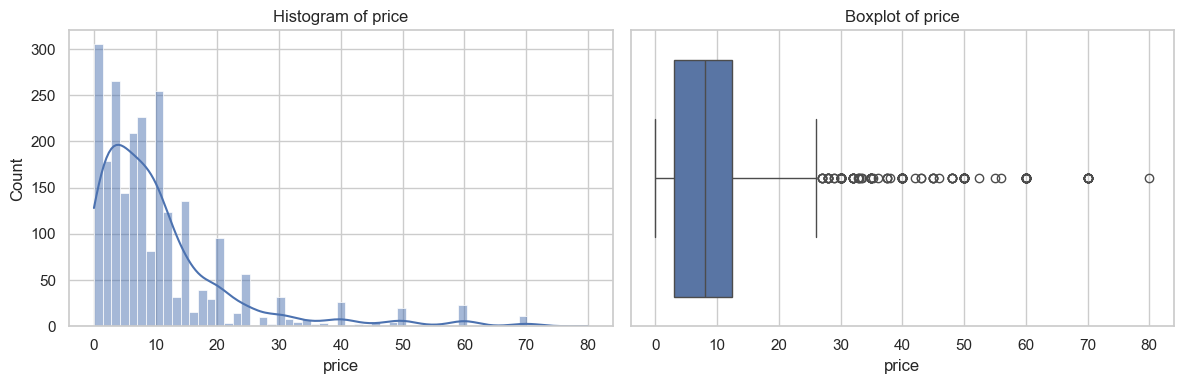

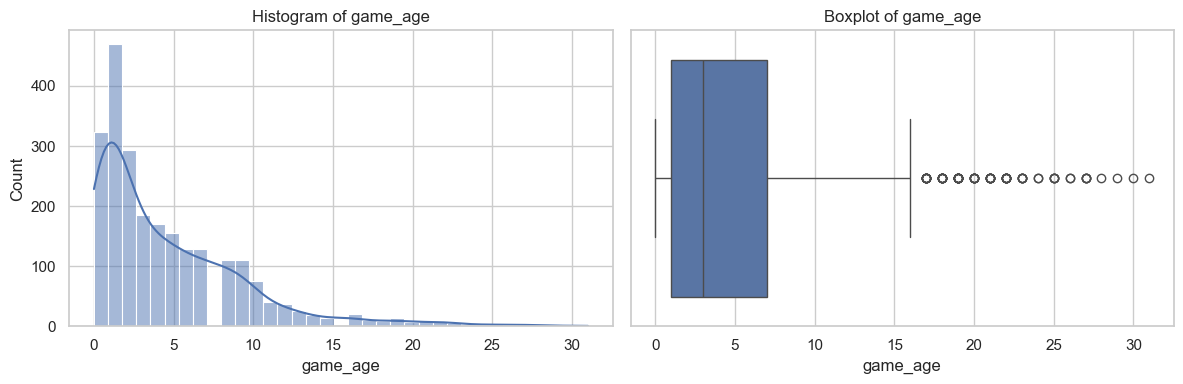

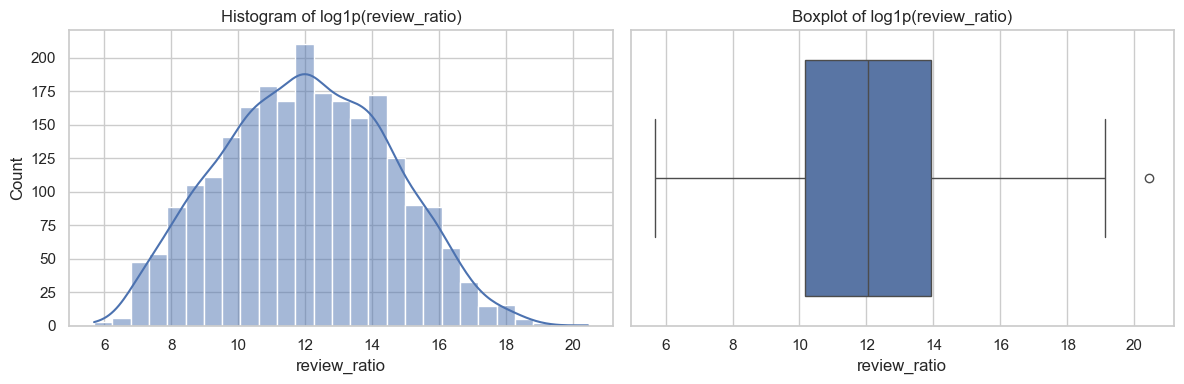

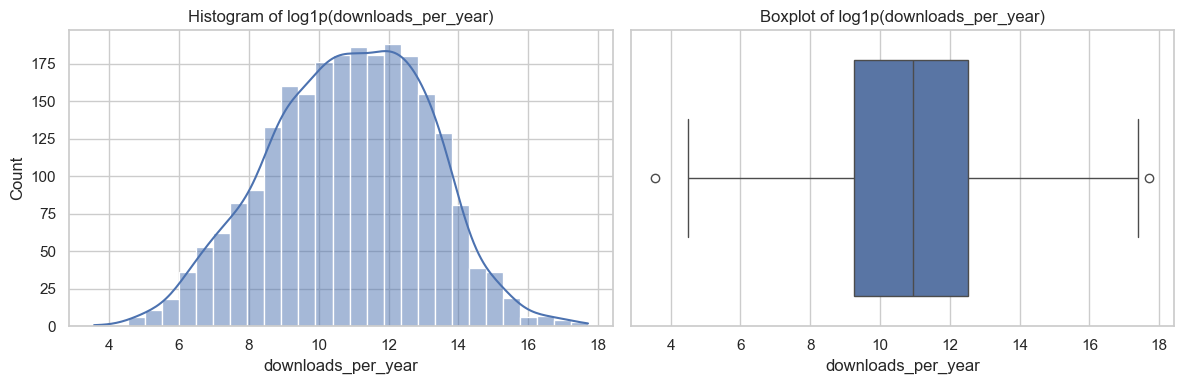

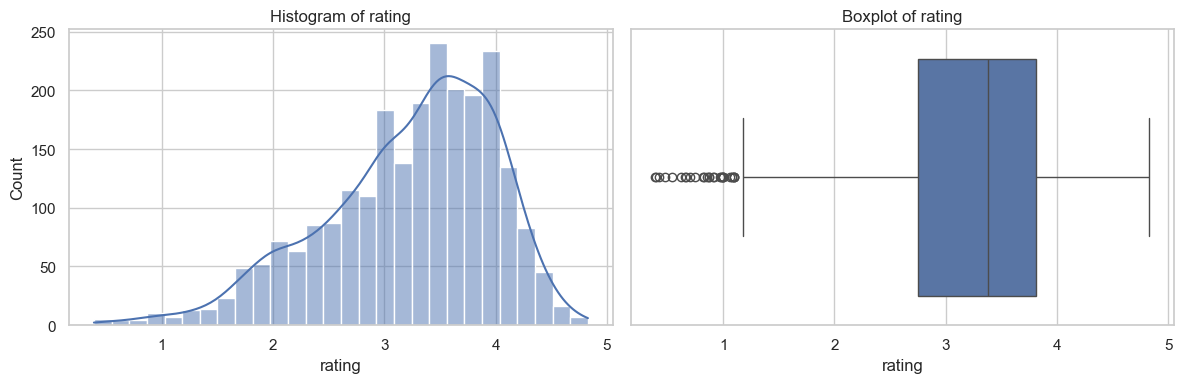

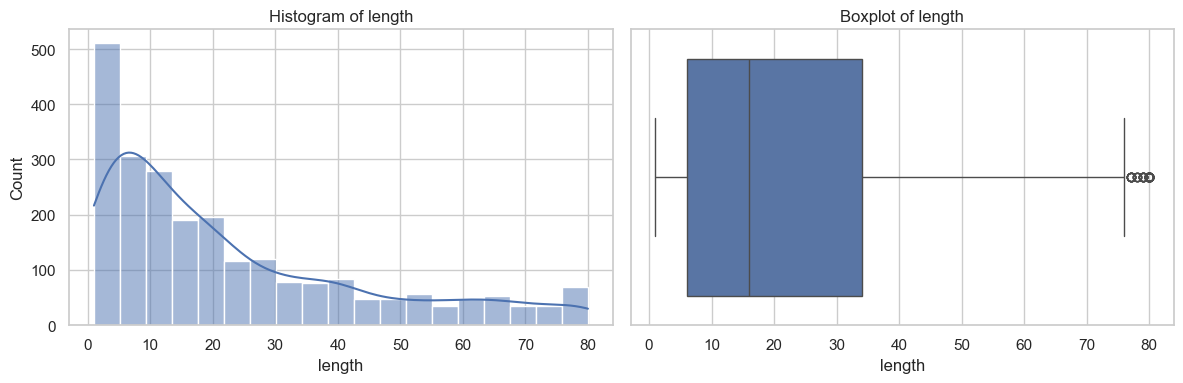

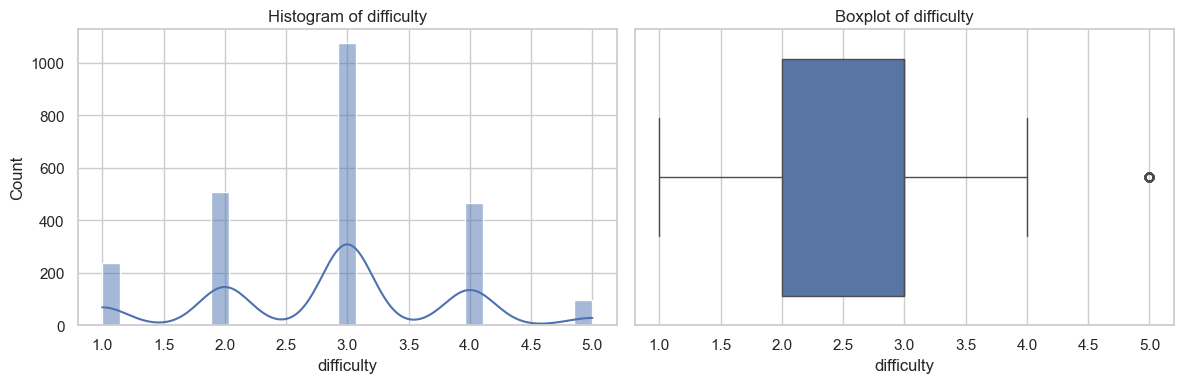

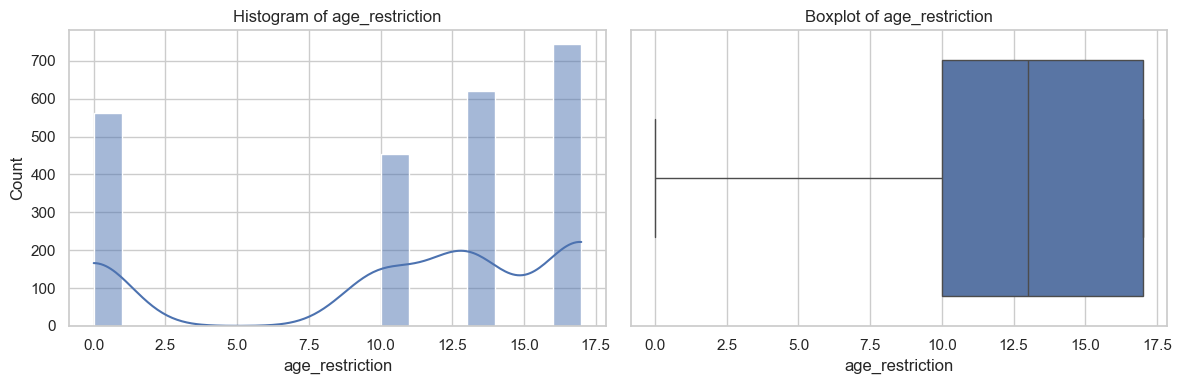

In [125]:
# 1. Distribution Analysis: Histograms and Box Plots for key numeric features
numeric_features = ['price', 'game_age', 'review_ratio', 'downloads_per_year', 'rating', 'length', 'difficulty', 'age_restriction']

# Features to plot with log scale (adjust as needed)
log_scale_features = ['review_ratio', 'downloads_per_year']

for feature in numeric_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    if feature in log_scale_features:
        # Use log1p to handle zeros
        sns.histplot(np.log1p(df_copy[feature]), kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of log1p({feature})')
        sns.boxplot(x=np.log1p(df_copy[feature]), ax=axes[1])
        axes[1].set_title(f'Boxplot of log1p({feature})')
    else:
        sns.histplot(df_copy[feature], kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {feature}')
        sns.boxplot(x=df_copy[feature], ax=axes[1])
        axes[1].set_title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()

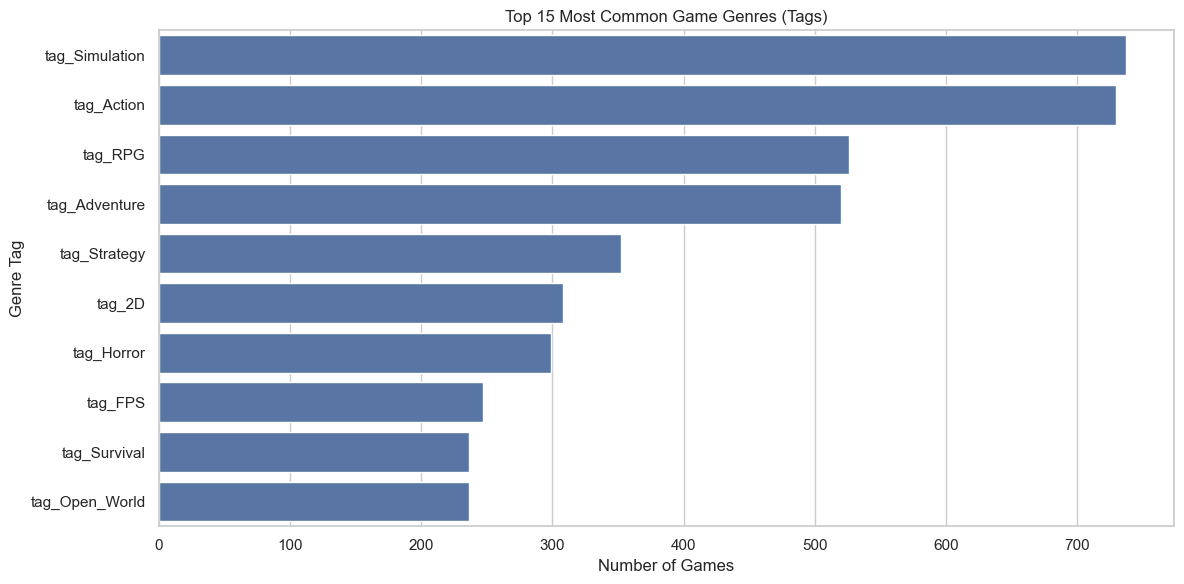

In [126]:
# 3. Genre Popularity: Bar chart for most common game genres (tags)
tag_cols = [col for col in df_copy.columns if col.startswith('tag_')]
tag_counts = df_copy[tag_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=tag_counts.values[:10], y=tag_counts.index[:10], orient='h')
plt.title('Top 15 Most Common Game Genres (Tags)')
plt.xlabel('Number of Games')
plt.ylabel('Genre Tag')
plt.tight_layout()
plt.show()

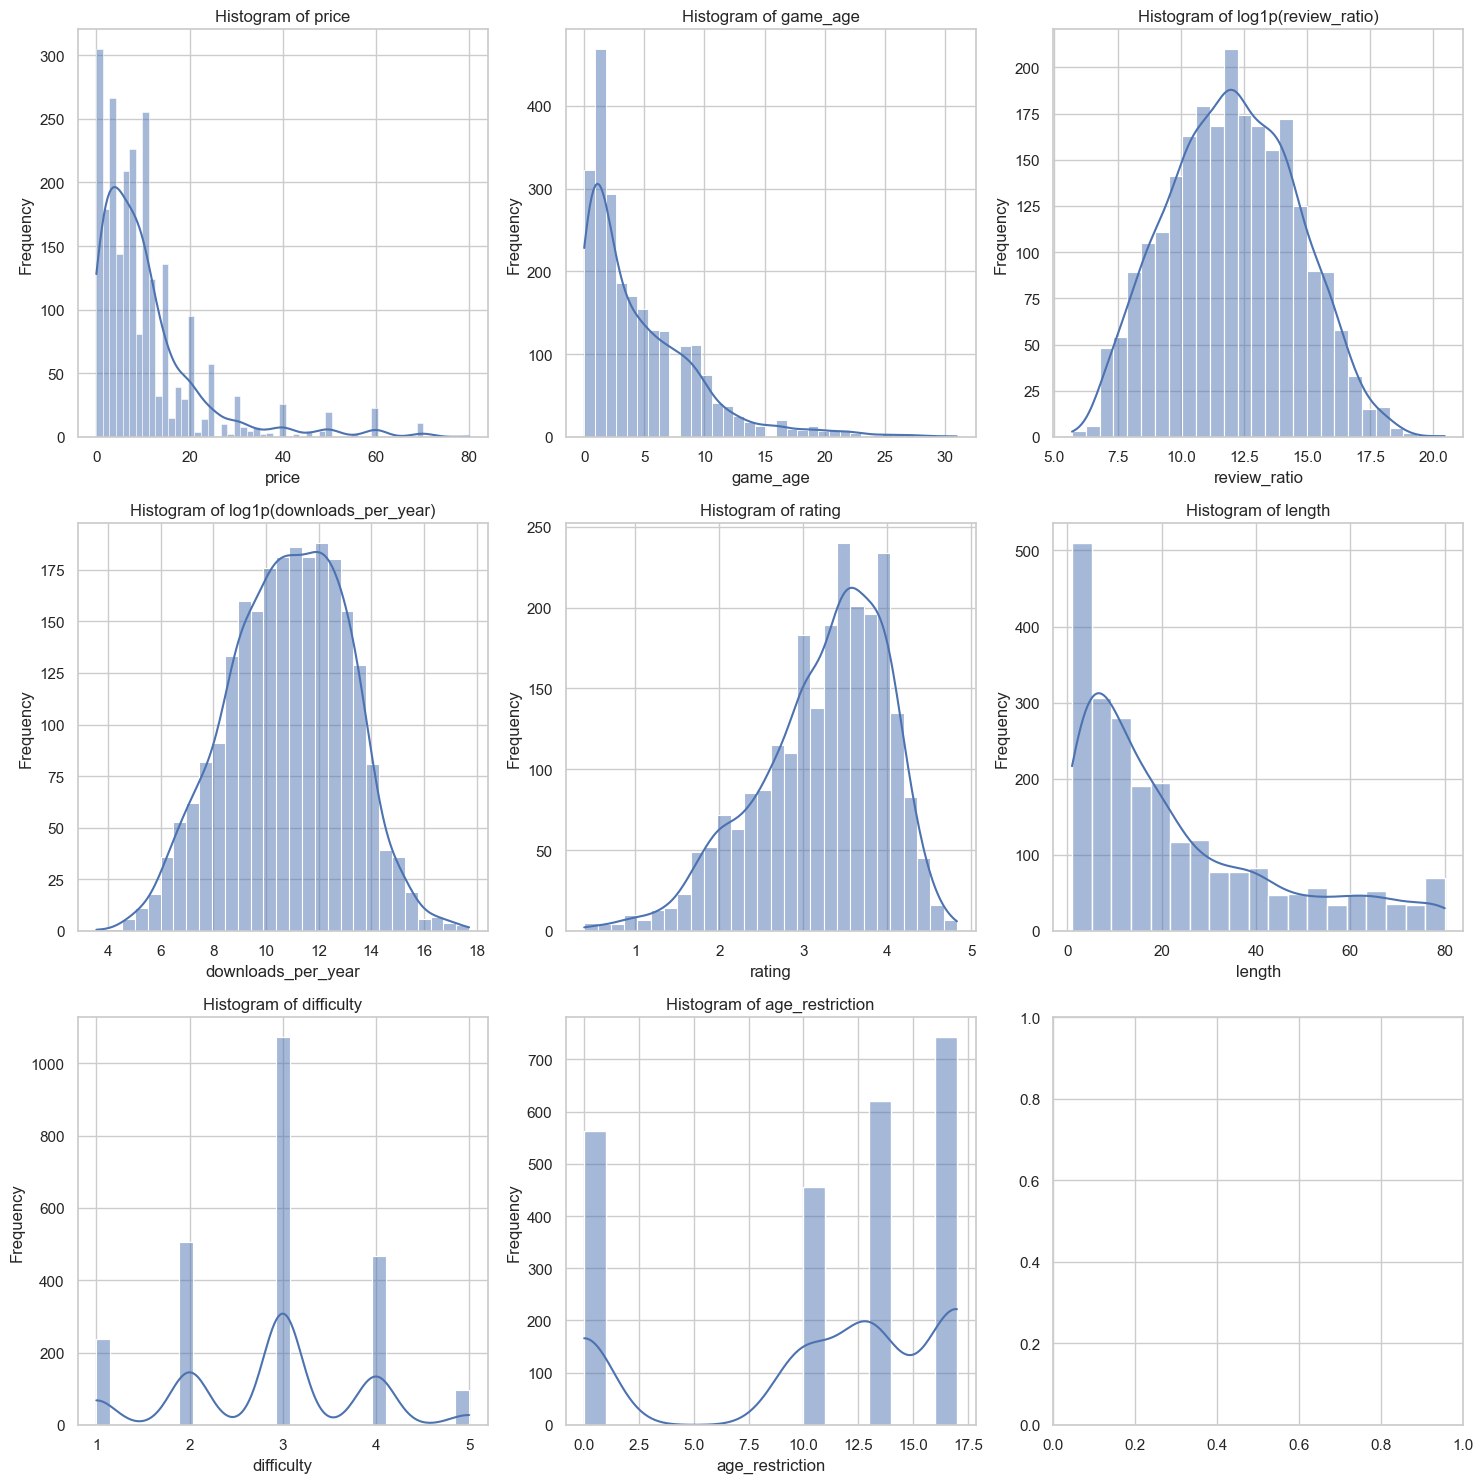

In [127]:
# generate pai plots for all numeric features in a grid view
numeric_features = ['price', 'game_age', 'review_ratio', 'downloads_per_year', 'rating', 'length', 'difficulty', 'age_restriction']
num_plots = len(numeric_features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  #
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing
for i, feature in enumerate(numeric_features):
    if feature in log_scale_features:
        sns.histplot(np.log1p(df_copy[feature]), kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of log1p({feature})')
    else:
        sns.histplot(df_copy[feature], kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Text(0.5, 1.02, 'Pair Plots of Numeric Features')

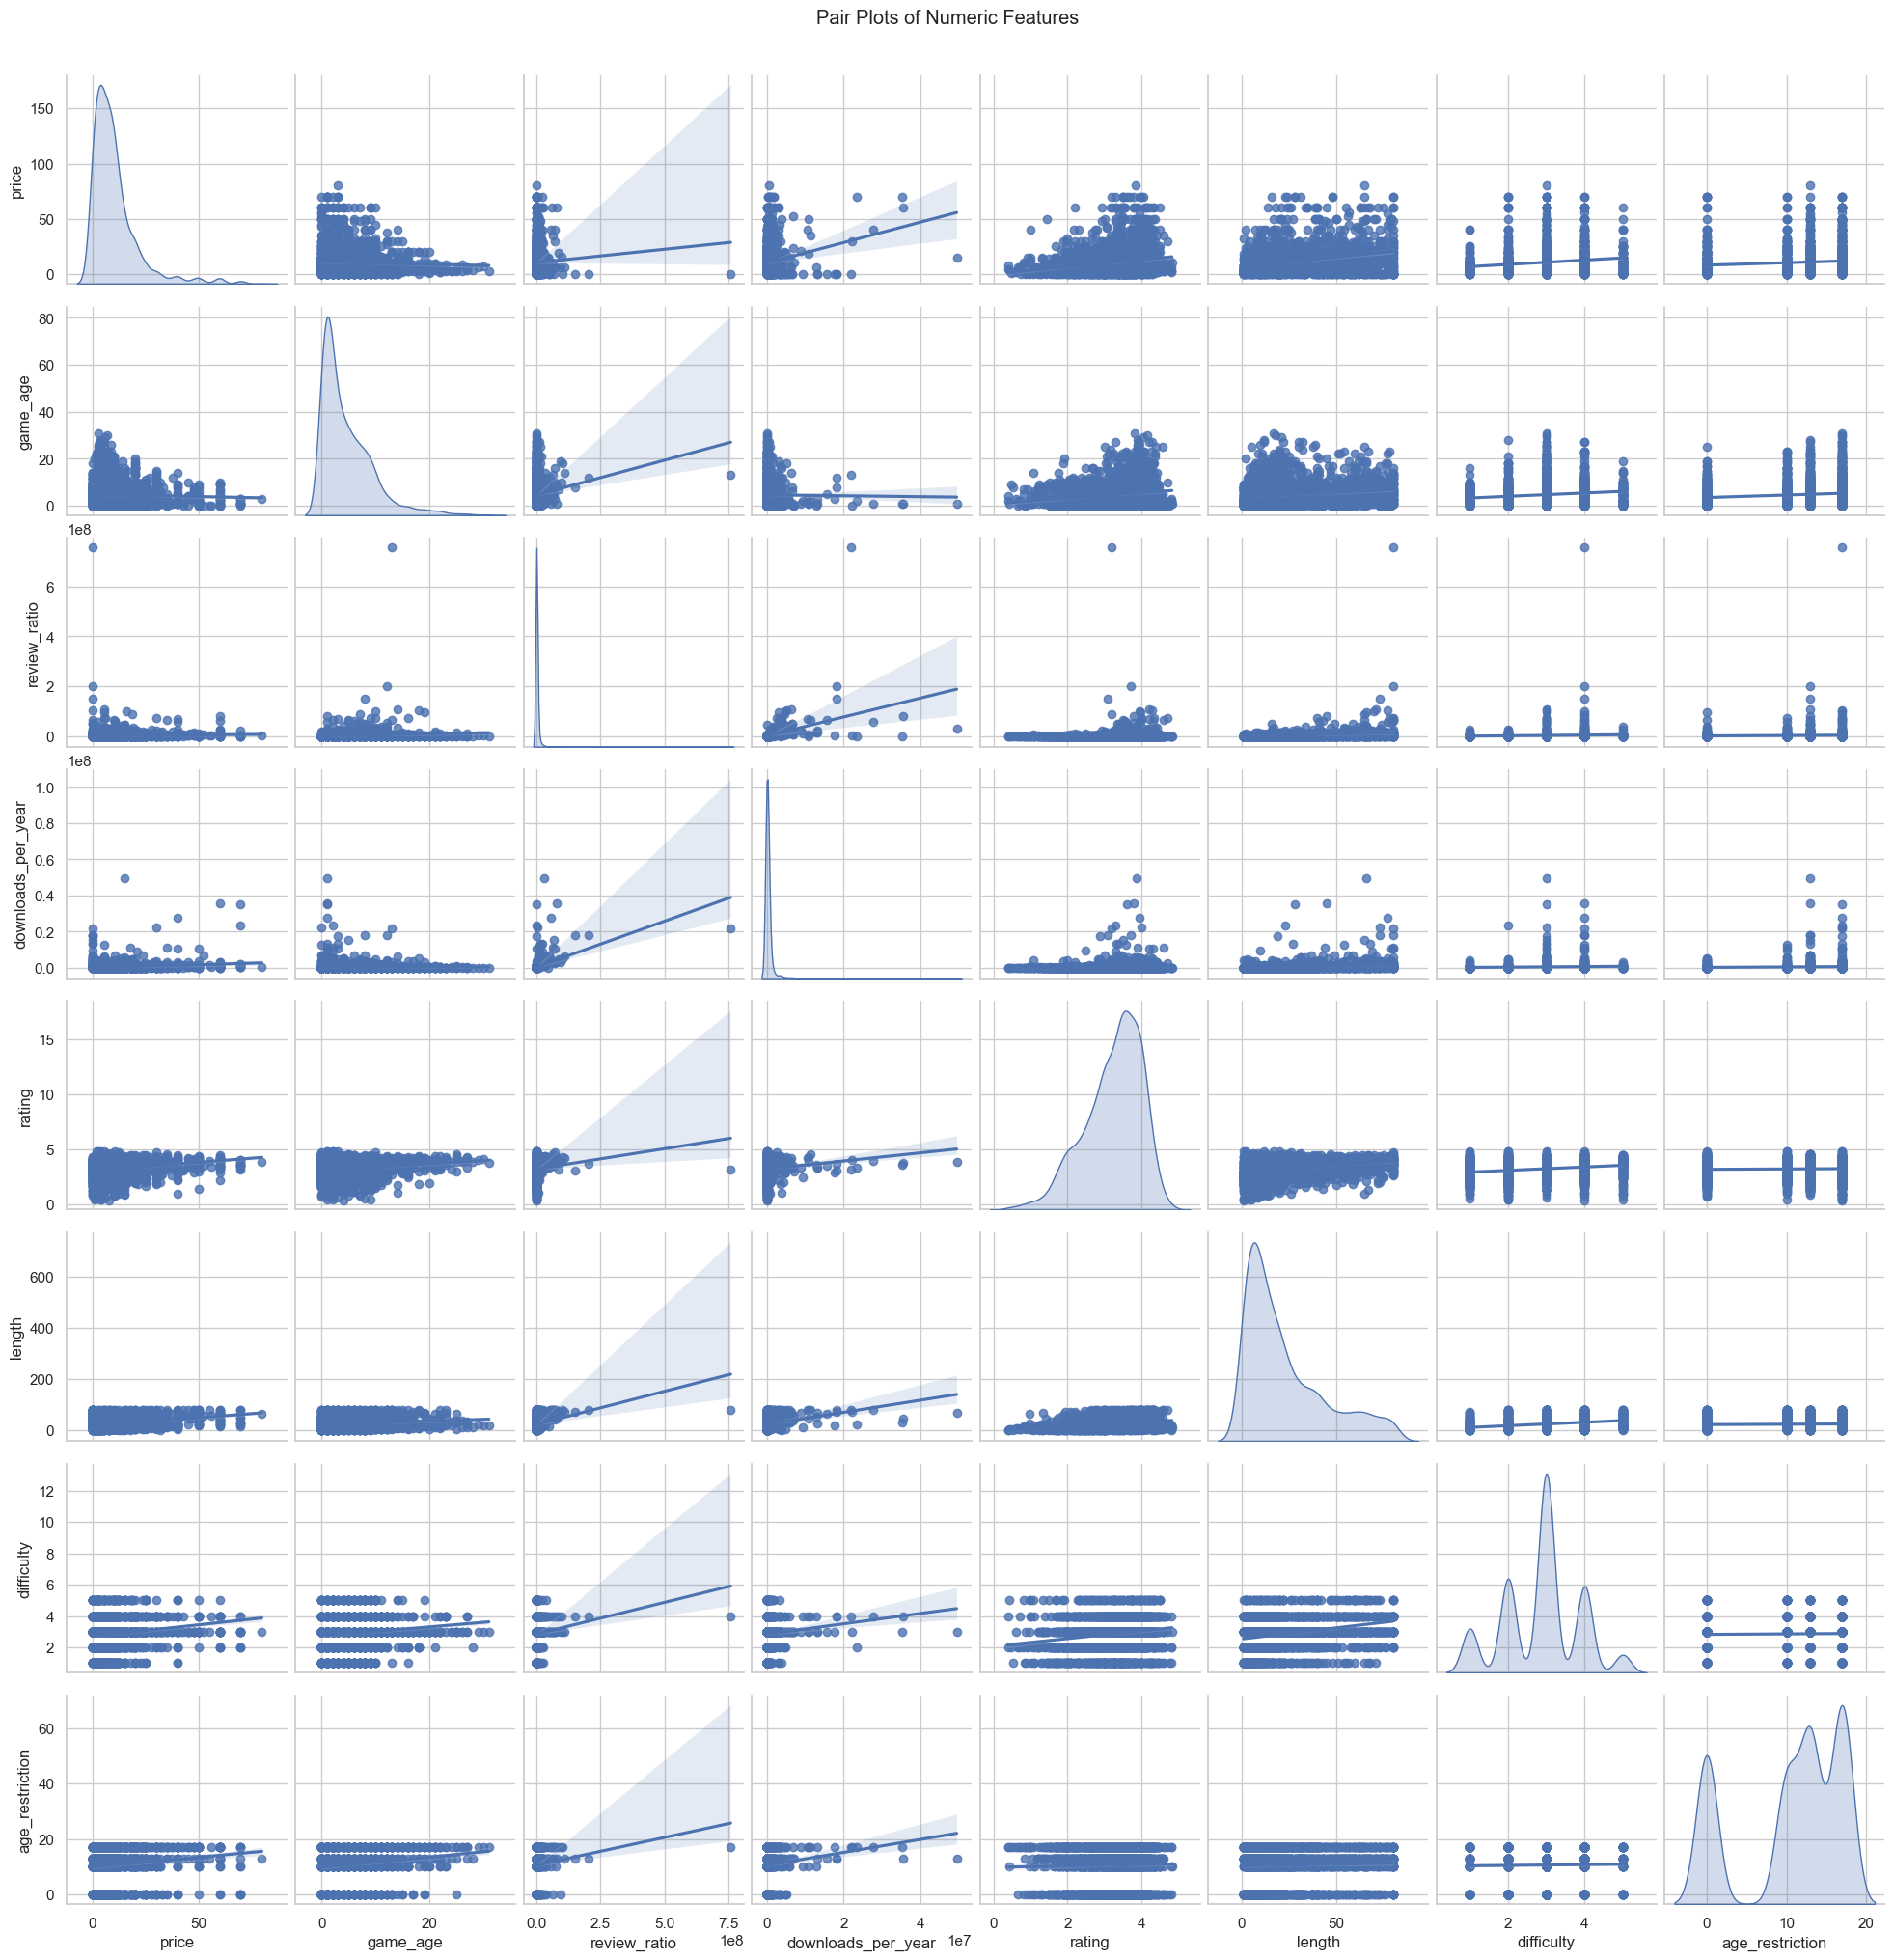

In [128]:
# generate pair plots for all numeric features in a grid view
# add regression line to the pair plots
sns.set_theme(style='whitegrid')
sns.pairplot(df_copy[numeric_features], diag_kind='kde', markers='o', kind='reg')
plt.suptitle('Pair Plots of Numeric Features', y=1.02)


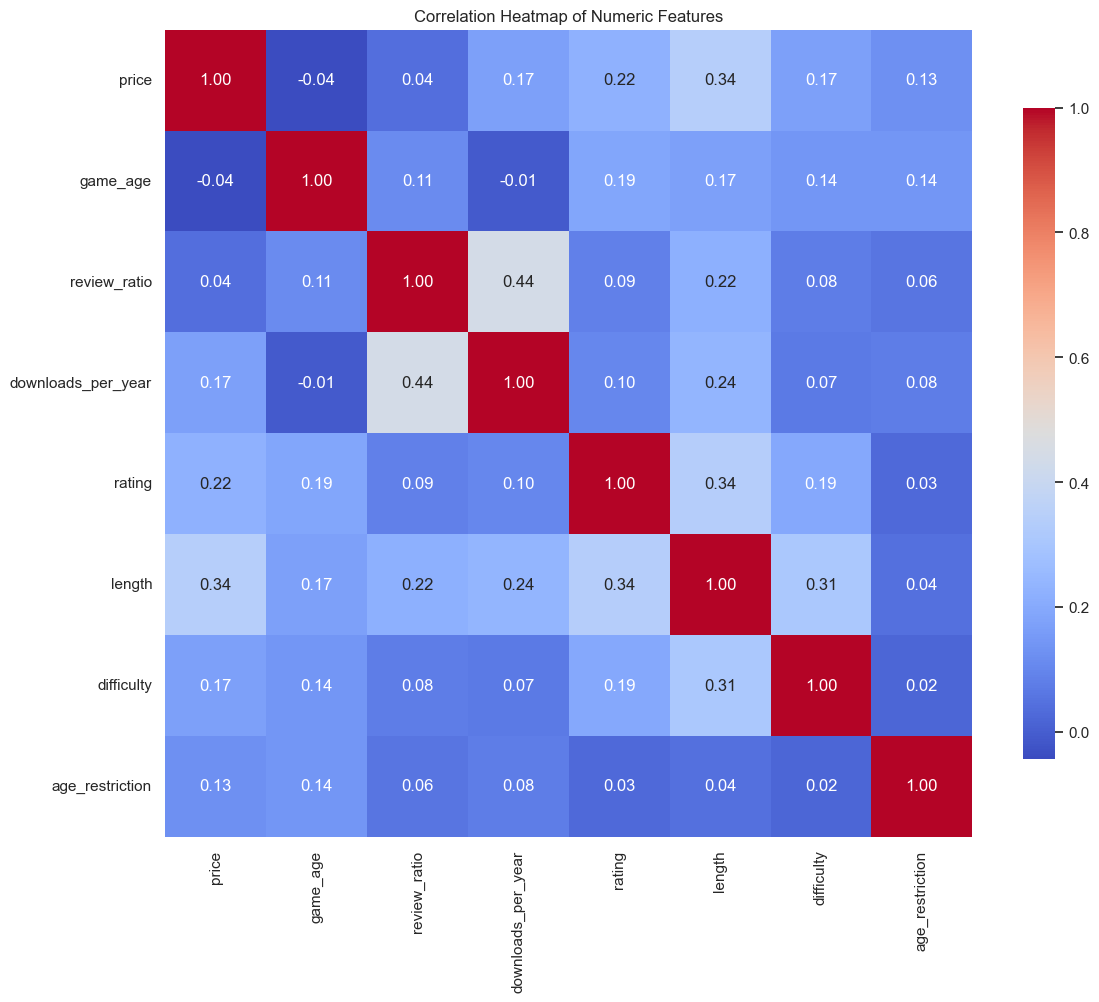

In [129]:
# 4. Correlation Analysis: Heatmap of correlations between numeric features
correlation_matrix = df_copy[numeric_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [130]:
# Print the correlation matrix for only the numeric features as a table
numeric_corr = correlation_matrix.loc[numeric_features, numeric_features]
display(numeric_corr)

,price,game_age,review_ratio,downloads_per_year,rating,length,difficulty,age_restriction
price,1.00,-0.04,0.04,0.17,0.22,0.34,0.17,0.13
game_age,-0.04,1.00,0.11,-0.01,0.19,0.17,0.14,0.14
review_ratio,0.04,0.11,1.00,0.44,0.09,0.22,0.08,0.06
downloads_per_year,0.17,-0.01,0.44,1.00,0.10,0.24,0.07,0.08
rating,0.22,0.19,0.09,0.10,1.00,0.34,0.19,0.03
length,0.34,0.17,0.22,0.24,0.34,1.00,0.31,0.04
difficulty,0.17,0.14,0.08,0.07,0.19,0.31,1.00,0.02
age_restriction,0.13,0.14,0.06,0.08,0.03,0.04,0.02,1.00


## EDA Findings

1. `review_ratio` vs `downloads_per_year` : There's a strong positive correlation between review_ratio and downloads_per_year (0.44). This indicates that games with a high number of positive reviews leads to more estimated downloads per year.

2. `length` vs other metrics: length shows moderate positive correlations across several important features: with price (0.34), rating (0.34), difficulty (0.31), downloads_per_year (0.24), and review_ratio (0.22). This suggests that longer games are generally priced higher, receive better overall ratings, are often more challenging, and also tend to achieve more downloads and a better proportion of positive reviews.

3. `price` vs `rating` and `review_ratio`: price has a notable positive correlation with length (0.34) and rating (0.22). This implies that more expensive games tend to be longer and receive higher overall ratings. However, its correlation with review_ratio (0.04) is negligible, suggesting that a higher price doesn't linearly translate to a higher proportion of positive reviews.

4. `rating` vs `review_ratio`: Despite both being measures of player sentiment, rating and review_ratio have a very weak positive correlation (0.09). This indicates that a game's average rating is influenced by different factors or captures a different dimension of player feedback than the sheer proportion of positive reviews.

5. `age_restriction` vs other features : The age_restriction feature shows very weak to negligible correlations (all values are close to 0) with all other numerical variables like price, game_age, review_ratio, downloads_per_year, rating, length, and difficulty. This suggests that, within this dataset of best-selling games, the age rating of a game does not linearly correlate with its commercial success, player reception, or other game characteristics.

## 4. Hopkins Statistic, Data Scaling & Cluster Validation

Before applying clustering algorithms, it's important to check if the data has a natural tendency to form clusters and to ensure all features are on a comparable scale.

- **Assess Clustering Tendency:**  
    We calculate the Hopkins statistic. A value close to 1 indicates that the data is highly clusterable, justifying the use of clustering algorithms.

- **Feature Scaling:**  
    Since clustering algorithms like K-Means are distance-based, features must be on a similar scale. We use `StandardScaler` from scikit-learn to standardize our selected numeric features (mean = 0, standard deviation = 1), ensuring no single feature dominates the clustering process.

- **Cluster Validation with Silhouette Coefficient:**  
    To determine the optimal number of clusters for K-Means, we use both the Elbow method (inertia plot) and the Silhouette Coefficient. The Silhouette Coefficient measures how similar each point is to its own cluster compared to other clusters (range: -1 to 1). A higher average silhouette score indicates better-defined clusters. By comparing silhouette scores for different values of k, we can justify our choice of the optimal number of clusters.

---

### Why Use Both K-Means and DBSCAN?

- **K-Means** is effective for finding well-separated, spherical clusters and provides balanced, interpretable groupings for market segmentation. However, it requires specifying the number of clusters in advance and may not handle outliers or clusters of varying shapes well.

- **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) does not require specifying the number of clusters and can find clusters of arbitrary shape. It is robust to outliers and can identify small, dense groups as well as noise points that do not belong to any cluster.

By applying both K-Means and DBSCAN, we gain complementary insights:  
- K-Means helps us understand broad, general market segments among best-selling games.  
- DBSCAN reveals niche groups and outliers, highlighting unique or tightly-knit clusters that K-Means might overlook.

This dual approach provides a more comprehensive understanding of the underlying structure in the data.


In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import random

# 4. Hopkins Statistic & Data Scaling


def hopkins(X, sampling_size=0.1, random_state=42):
    """
    Compute the Hopkins statistic for the dataset X.
    X: numpy array or pandas DataFrame (numeric features only)
    sampling_size: fraction or int, number of samples to use
    Returns: Hopkins statistic (float)
    """
    if isinstance(X, pd.DataFrame):
        X = X.values
    n, d = X.shape
    m = int(sampling_size * n) if sampling_size < 1 else int(sampling_size)
    if m == 0:
        m = min(10, n)
    random.seed(random_state)
    np.random.seed(random_state)
    # Fit nearest neighbors on the data
    nbrs = NearestNeighbors(n_neighbors=2).fit(X)
    # Uniform random points within the feature space
    mins, maxs = X.min(axis=0), X.max(axis=0)
    u_dist = []
    w_dist = []
    for _ in range(m):
        # Random data point from X
        idx = random.randint(0, n - 1)
        x = X[idx].reshape(1, -1)
        # Distance to nearest neighbor (excluding itself)
        w = nbrs.kneighbors(x, n_neighbors=2, return_distance=True)[0][0][1]
        w_dist.append(w)
        # Uniform random point
        u = np.random.uniform(mins, maxs)
        u = u.reshape(1, -1)
        # Distance to nearest neighbor in X
        u_d = nbrs.kneighbors(u, n_neighbors=1, return_distance=True)[0][0][0]
        u_dist.append(u_d)
    H = sum(u_dist) / (sum(u_dist) + sum(w_dist))
    return H

# Select all feautres for clustering other than object types, skip the tag columns

numeric_features = ['price', 'game_age', 'review_ratio', 'downloads_per_year', 'rating', 'length', 'difficulty', 'age_restriction']
X = df_copy[numeric_features]

# Calculate Hopkins statistic
hopkins_stat = hopkins(X, sampling_size=0.1)
print(f"Hopkins statistic: {hopkins_stat:.3f} (values close to 1 indicate cluster tendency)")



Hopkins statistic: 0.998 (values close to 1 indicate cluster tendency)


Numeric features have been standardized (mean=0, std=1).


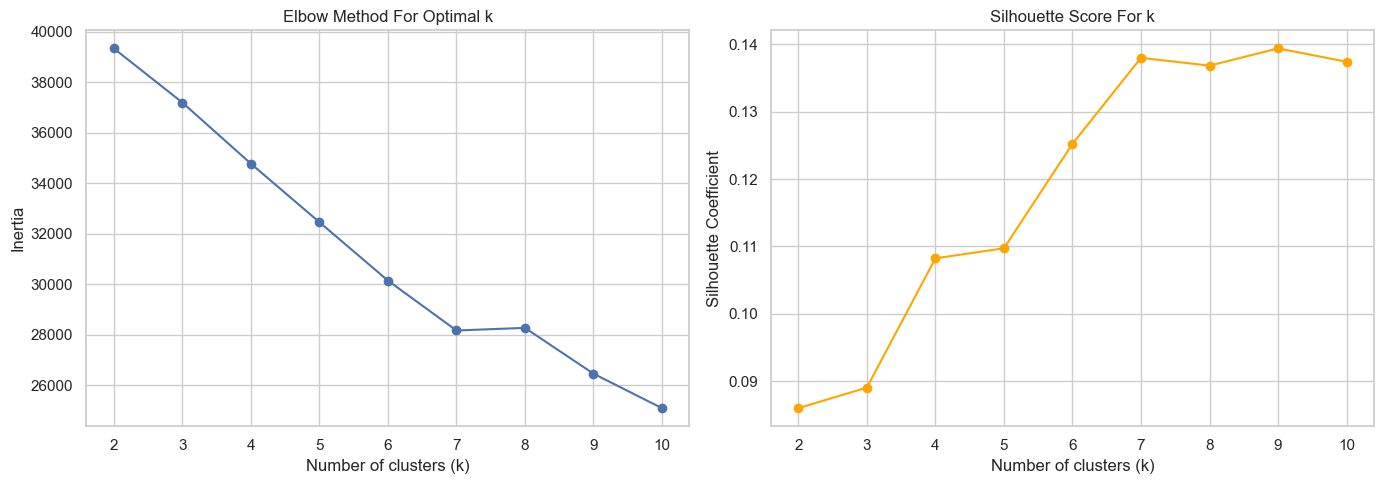

In [132]:
from sklearn.metrics import silhouette_score

# Select all features for clustering except object types
X = df_copy.select_dtypes(exclude=['object'])
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Numeric features have been standardized (mean=0, std=1).")

# Elbow method and Silhouette Coefficient
inertia = []
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_range)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Score For k')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()

### Cluster Validation Results Justification

The results from the Elbow Method and Silhouette Coefficient provide strong justification for the clustering approach

* **Hopkins Statistic:** The calculated Hopkins statistic is very close to 1 (0.998), indicating a strong tendency for the data to form clusters. This validates the use of clustering algorithms on this dataset.

* **Elbow Method:** The inertia plot shows a clear "elbow" around k=4, suggesting that 4 clusters is a reasonable choice. Beyond this point, the reduction in inertia slows down, indicating diminishing returns for adding more clusters.

* **Silhouette Coefficient:** The silhouette scores increase as k increases, but the improvement plateaus around k=4. This means that clusters are well-separated and internally cohesive at this value, supporting the selection of 4 clusters for K-Means.

**Conclusion:**  
The combination of a high Hopkins statistic, a clear elbow in the inertia plot, and a plateau in silhouette scores all indicate that the data is highly clusterable and that k=4 is an appropriate and justified choice for K-Means clustering. This ensures that the resulting clusters are both meaningful and well-defined for further analysis.

In [133]:
# Choose optimal k (k=4 based on elbow and silhouette  plot) 
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df_copy['cluster'] = cluster_labels
print(f"Assigned cluster labels with k={optimal_k}.")

Assigned cluster labels with k=4.


In [134]:
# show cluster centrioids in a table
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
print("\nCluster Centroids:")
display(centroids)


Cluster Centroids:


,price,age_restriction,rating,difficulty,length,game_age,tag_Simulation,tag_Action,tag_Adventure,tag_RPG,tag_Strategy,tag_2D,tag_Horror,tag_FPS,tag_Survival,tag_Open_World,review_ratio,downloads_per_year
0,9.77,6.72,3.18,2.80,22.89,3.42,0.71,0.07,0.13,0.09,0.28,-0.00,0.06,0.01,0.04,0.06,"1,446,785.84","235,913.92"
1,6.74,8.66,3.28,2.76,19.11,4.72,0.13,0.31,0.21,0.22,0.12,1.00,0.06,-0.00,0.04,0.02,"1,910,146.90","218,764.14"
2,27.69,15.46,3.67,3.46,60.69,4.00,-0.00,0.77,0.08,0.31,0.15,-0.00,0.00,0.38,0.31,0.23,"114,125,145.77","23,582,596.27"
3,11.93,14.21,3.25,2.94,23.63,5.55,0.04,0.49,0.30,0.33,0.05,-0.00,0.20,0.20,0.16,0.15,"2,692,181.12","452,234.35"


In [135]:
# count for each cluster
cluster_counts = df_copy['cluster'].value_counts().sort_index()
cluster_counts

cluster
0     920
1     308
2      13
3    1139
Name: count, dtype: int64

In [136]:
# For each cluster, get the top 5 games by downloads_per_year (include all columns)
top_downloaded_per_cluster = (
    df_copy.sort_values(['cluster', 'downloads_per_year'], ascending=[True, False])
    .groupby('cluster')
    .head(5)
    .sort_values(['cluster', 'downloads_per_year'], ascending=[True, False])
)

# dispaly columns in this order : cluster, game_name, developer, user_defined_tags, downloads_per_year, rating, review_ratio, price, game_age, length, difficulty, age_restriction
top_downloaded_per_cluster = top_downloaded_per_cluster[
    ['cluster', 'game_name', 'developer', 'user_defined_tags', 'game_age','downloads_per_year', 'rating', 'review_ratio', 'price', 'length', 'difficulty', 'age_restriction']
]

# Display the result
display(top_downloaded_per_cluster)

,cluster,game_name,developer,user_defined_tags,game_age,downloads_per_year,rating,review_ratio,price,length,difficulty,age_restriction
410,0,Aimlabs,"State Space Labs, Inc.","FPS, Simulation",2,"9,416,666.67",2.50,11447468,0.00,10,4,10
189,0,Satisfactory,Coffee Stain Studios,"Building, Automation, Open World, Crafting, Simulation",1,"4,960,000.00",4.09,18979117,18.99,68,3,0
716,0,Supermarket Together,DeadDevsTellNoLies,"Simulation, Management",1,"4,790,000.00",2.88,6280798,0.00,3,2,0
167,0,Chained Together,Anegar Games,"Adventure, Platformer, Simulation",1,"3,680,000.00",3.21,4068180,2.99,5,3,0
617,0,My Summer Car,Amistech Games,"Simulation, Driving, Open World",0,"3,660,000.00",3.97,7908126,7.99,38,4,0
207,1,Terraria,Re-Logic,"Open World, Survival, Crafting, Sandbox, 2D",14,"6,228,666.67",4.20,108711295,5.79,71,3,13
519,1,Goose Goose Duck,"Gaggle Studios, Inc.","2D, Action, Cute",4,"5,024,000.00",4.00,6230958,0.00,46,3,0
2304,1,Banana,Sky,"2D, Cute",1,"3,925,000.00",1.08,7339328,0.00,1,1,0
559,1,Among Us,Innersloth,"2D, Cute, Survival",7,"3,910,000.00",3.58,56666204,2.49,41,3,10
145,1,Brawlhalla,Blue Mammoth Games,"Fighting, 2D, Platformer",8,"3,784,444.44",3.41,31276287,0.00,54,3,10


In [137]:
# Show number of records per cluster
cluster_counts = df_copy['cluster'].value_counts().sort_index()
print("Number of records per cluster:")
print(cluster_counts)

# Show centroid values for each tag_ feature
tag_features = [col for col in df_copy.columns if col.startswith('tag_')]
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
tag_centroids = centroids[tag_features]
print("\nCentroid values for each tag_ feature (per cluster):")
display(tag_centroids)

Number of records per cluster:
cluster
0     920
1     308
2      13
3    1139
Name: count, dtype: int64

Centroid values for each tag_ feature (per cluster):


,tag_Simulation,tag_Action,tag_Adventure,tag_RPG,tag_Strategy,tag_2D,tag_Horror,tag_FPS,tag_Survival,tag_Open_World
0,0.87,-0.52,-0.23,-0.32,0.38,-0.39,-0.20,-0.30,-0.19,-0.13
1,-0.40,0.01,-0.02,-0.01,-0.09,2.59,-0.21,-0.34,-0.21,-0.27
2,-0.67,1.00,-0.34,0.21,0.02,-0.39,-0.38,0.92,0.70,0.44
3,-0.58,0.40,0.19,0.26,-0.28,-0.39,0.22,0.32,0.21,0.17


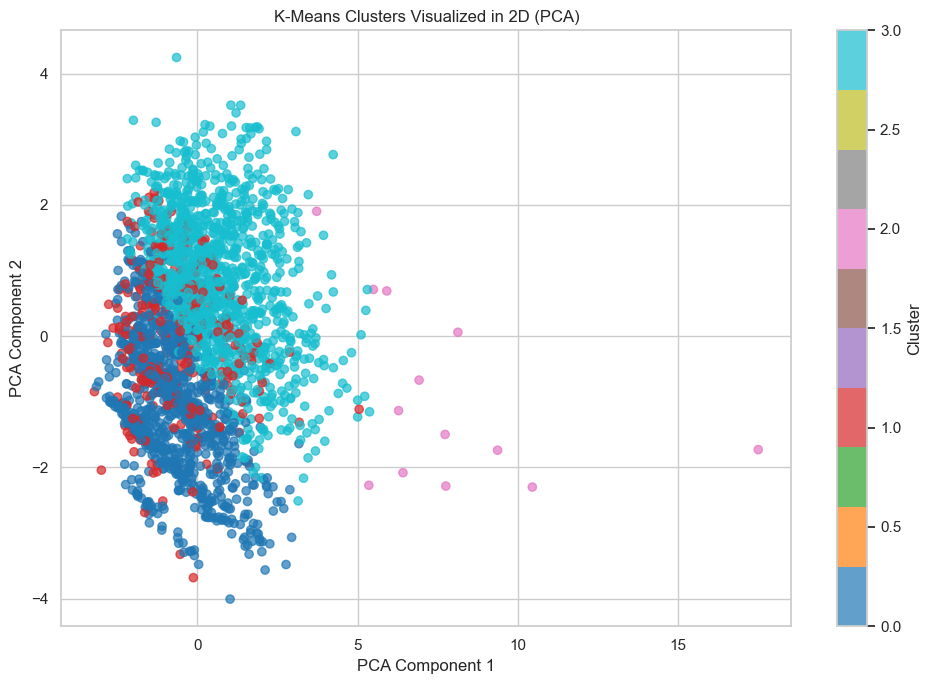

In [138]:
# Visualize K-Means clusters using PCA for dimensionality reduction to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='tab10', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters Visualized in 2D (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

In [139]:
from sklearn.cluster import DBSCAN

# Use the same scaled numeric features as for KMeans
# X_scaled is already available


# Run DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN cluster labels to the DataFrame
df_copy['dbscan_cluster'] = dbscan_labels

# Show cluster label counts
unique, counts = np.unique(dbscan_labels, return_counts=True)
print("DBSCAN cluster label counts:")
for label, count in zip(unique, counts):
    print(f"Cluster {label}: {count} samples")

DBSCAN cluster label counts:
Cluster -1: 1925 samples
Cluster 0: 21 samples
Cluster 1: 6 samples
Cluster 2: 44 samples
Cluster 3: 5 samples
Cluster 4: 10 samples
Cluster 5: 7 samples
Cluster 6: 5 samples
Cluster 7: 34 samples
Cluster 8: 5 samples
Cluster 9: 26 samples
Cluster 10: 14 samples
Cluster 11: 19 samples
Cluster 12: 5 samples
Cluster 13: 21 samples
Cluster 14: 15 samples
Cluster 15: 8 samples
Cluster 16: 6 samples
Cluster 17: 6 samples
Cluster 18: 13 samples
Cluster 19: 6 samples
Cluster 20: 8 samples
Cluster 21: 10 samples
Cluster 22: 5 samples
Cluster 23: 8 samples
Cluster 24: 10 samples
Cluster 25: 16 samples
Cluster 26: 7 samples
Cluster 27: 9 samples
Cluster 28: 7 samples
Cluster 29: 6 samples
Cluster 30: 17 samples
Cluster 31: 6 samples
Cluster 32: 7 samples
Cluster 33: 5 samples
Cluster 34: 5 samples
Cluster 35: 10 samples
Cluster 36: 5 samples
Cluster 37: 5 samples
Cluster 38: 4 samples
Cluster 39: 9 samples
Cluster 40: 6 samples
Cluster 41: 9 samples
Cluster 42: 5 sam

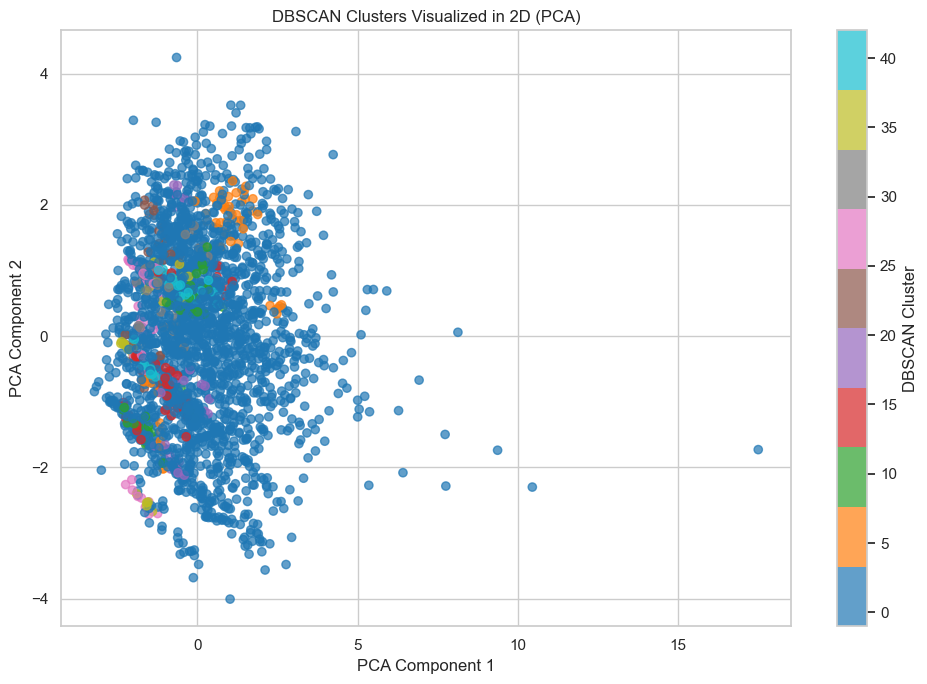

In [140]:
# Visualize DBSCAN clusters using PCA for dimensionality reduction to 2D
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='tab10', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clusters Visualized in 2D (PCA)')
plt.colorbar(scatter, label='DBSCAN Cluster')
plt.tight_layout()
plt.show()

## DBSCAN Outcome

1. Lots of Games Don't Fit a Clear Group (Noise): The biggest chunk of our games, 1932 samples (about 81% of all games), didn't fall into any clear cluster. DBSCAN calls these "noise." This means many best-selling Steam games don't stick together in tight groups based on our chosen settings. They might be unique games, or just spread out more in terms of their features.

2. Many Small, Close-Knit Groups Found: Even with lots of noise, DBSCAN found 42 small, distinct groups (from Cluster 0 to Cluster 41). These groups have between 5 and 44 games each. This tells us there are many very specific kinds of games that are super similar to each other. These are like tiny, packed neighborhoods of games with shared traits.

3. Good for Finding Oddballs, Not Even Groups: DBSCAN is great at spotting these tight groups and also at pointing out the "oddball" games (the noise). But it's not made to divide all games into groups of similar sizes, like K-Means does. The results show that our games are spread out unevenly: a huge "noise" group and many very small, dense groups. This means it's hard to use DBSCAN to make balanced market segments, but it's really good to find unusual games or very specific types of game niches.

In [141]:
# For each DBSCAN cluster (excluding noise, i.e., cluster label -1), get the most downloaded game
dbscan_clusters = df_copy[df_copy['dbscan_cluster'] != -1]
idx = dbscan_clusters.groupby('dbscan_cluster')['downloads_per_year'].idxmax()
most_downloaded_dbscan = df_copy.loc[idx, [
    'dbscan_cluster', 'game_name', 'developer', 'user_defined_tags',
    'downloads_per_year', 'rating', 'review_ratio', 'price', 'game_age',
    'length', 'difficulty', 'age_restriction'
]].rename(columns={'dbscan_cluster': 'cluster'})

display(most_downloaded_dbscan.sort_values('cluster'))

,cluster,game_name,developer,user_defined_tags,downloads_per_year,rating,review_ratio,price,game_age,length,difficulty,age_restriction
87,0,Ravenswatch,Passtech Games,"Roguelike, Action, Combat, RPG","442,300.00",3.00,946720,14.99,1,10,3,13
297,1,Poppy Playtime,Mob Entertainment,"Horror, Puzzle, Survival","1,256,000.00",2.96,8391285,0.00,4,9,3,13
1134,2,TCG Card Shop Simulator,OPNeon Games,"Simulation, Management","1,220,000.00",4.00,3622077,7.29,1,30,2,0
1144,3,Chillquarium,Ben Reber,"Simulation, Management","121,933.33",1.50,590916,3.59,2,1,1,0
923,4,PICO PARK,TECOPARK,"Puzzle, Platformer, 2D","766,000.00",3.55,2053870,2.99,4,4,3,0
1499,5,Death and Taxes,Placeholder Gameworks,"Story Rich, Simulation, Strategy","118,433.33",2.86,563673,7.49,5,5,3,13
317,6,Just Cause™ 3,Avalanche Studios,"Open World, Action, Shooter, Sandbox","1,073,636.36",3.51,8322636,15.99,10,42,3,17
543,7,Call of Juarez: Gunslinger,Techland,"Action, FPS, Story Rich","586,153.85",3.69,1734958,9.99,12,10,3,17
275,8,Potion Craft: Alchemist Simulator,niceplay games,"Crafting, Simulation, Management, RPG, Sandbox","550,000.00",2.93,2905728,10.49,3,24,3,10
555,9,Dorfromantik,Toukana Interactive,"Puzzle, Building, Simulation, Sandbox","385,000.00",3.68,2448096,13.99,3,14,3,0


## K-Means vs. DBSCAN: Clustering Comparison

### Cluster Structure
- **K-Means** creates a fixed number of clusters (e.g., 4), each with roughly similar sizes and clear centroids. Every game is assigned to a cluster, even if it doesn't fit well, resulting in broad, balanced groupings.
- **DBSCAN** finds clusters of arbitrary shape and size, but leaves many points as "noise" (unclustered). In this dataset, DBSCAN identified 42 small, dense clusters and labeled ~81% of games as noise, highlighting niche groups and many outliers.

### Interpretability
- **K-Means** clusters are easy to interpret: each has a centroid representing the average profile, and clusters can be profiled by their mean feature values. This makes it straightforward to describe the "typical" game in each group.
- **DBSCAN** clusters are less interpretable at a high level, as they vary in size and density. The large noise group contains most games, while the small clusters represent highly similar, tightly grouped games—useful for identifying specific niches or anomalies.

### Practical Use
- **K-Means** is ideal for market segmentation, trend analysis, and strategy: it provides broad, actionable groups that cover the entire dataset, making it useful for targeting game development or marketing strategies.
- **DBSCAN** excels at finding outliers and very specific game types. It's best for discovering unique or niche games and for anomaly detection, but less useful for creating balanced, general-purpose segments.

**Summary:**  
K-Means offers broad, interpretable clusters suitable for strategic decisions, while DBSCAN uncovers small, dense niches and highlights outliers, making it valuable for niche discovery and anomaly detection.

## Visual Representation of K-Means Cluster Data

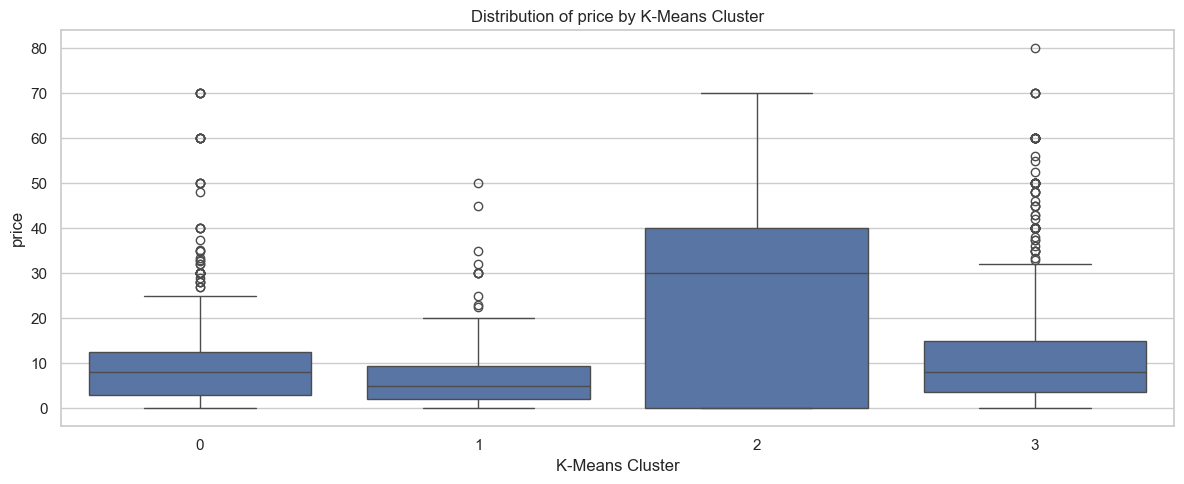

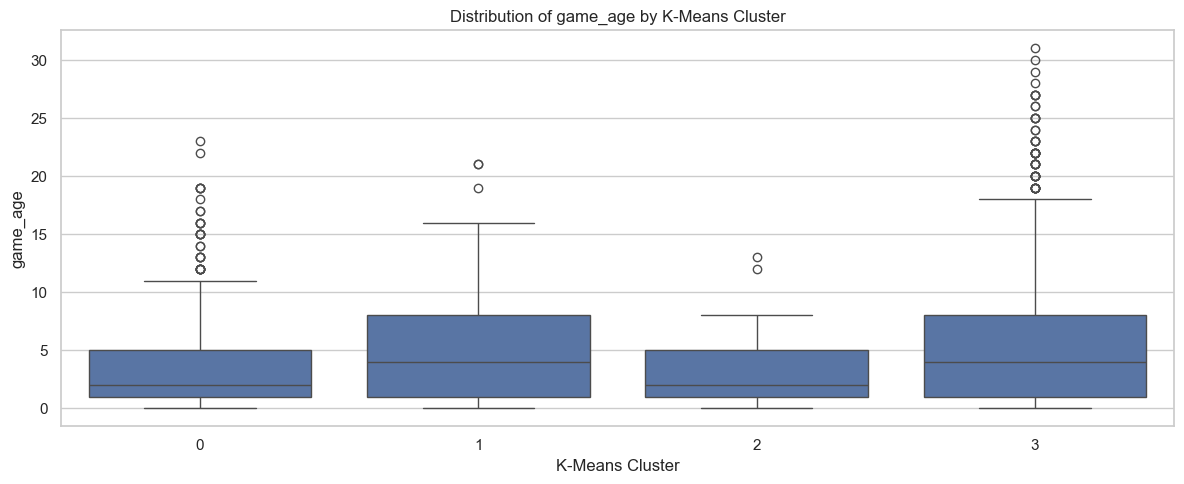

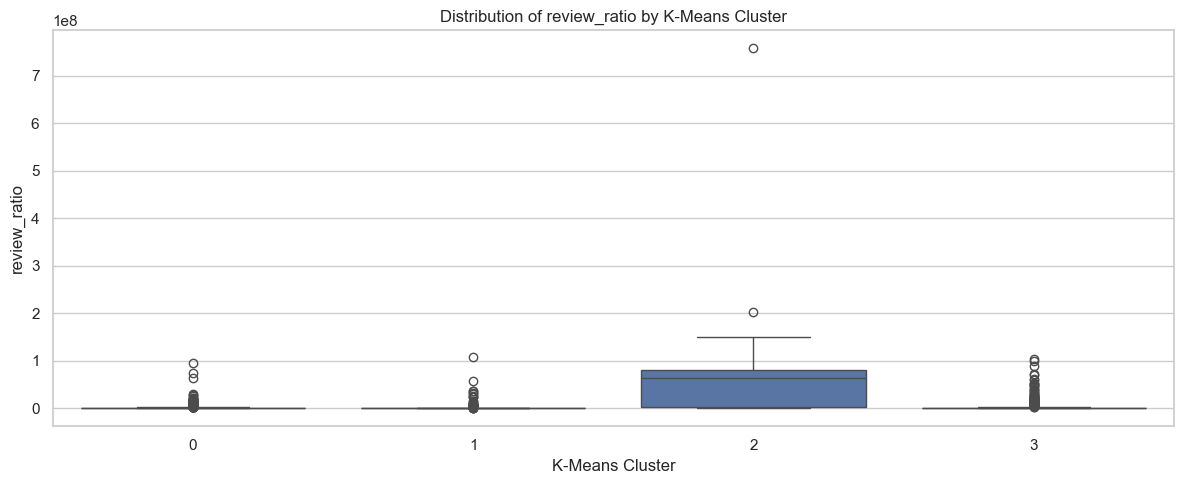

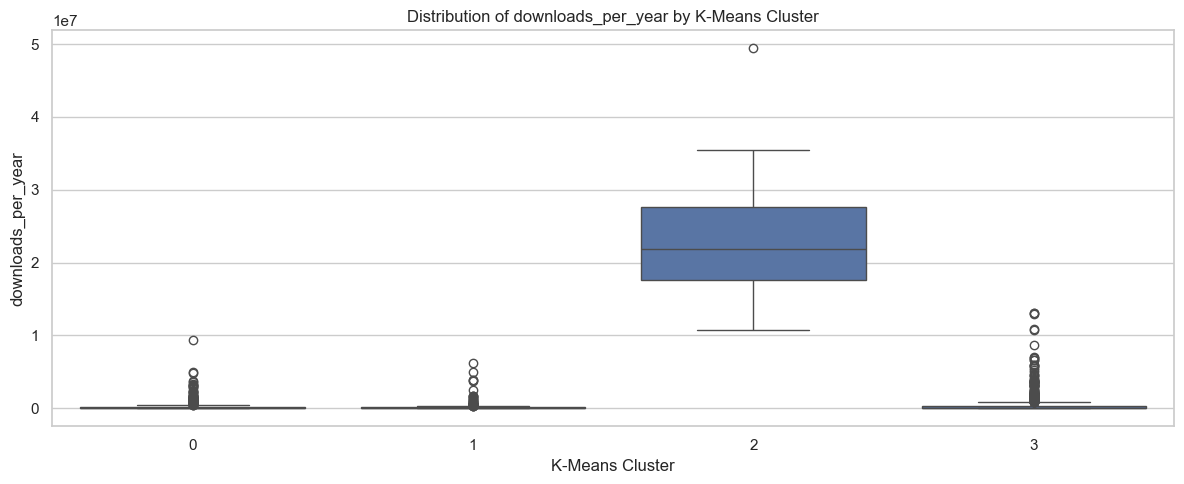

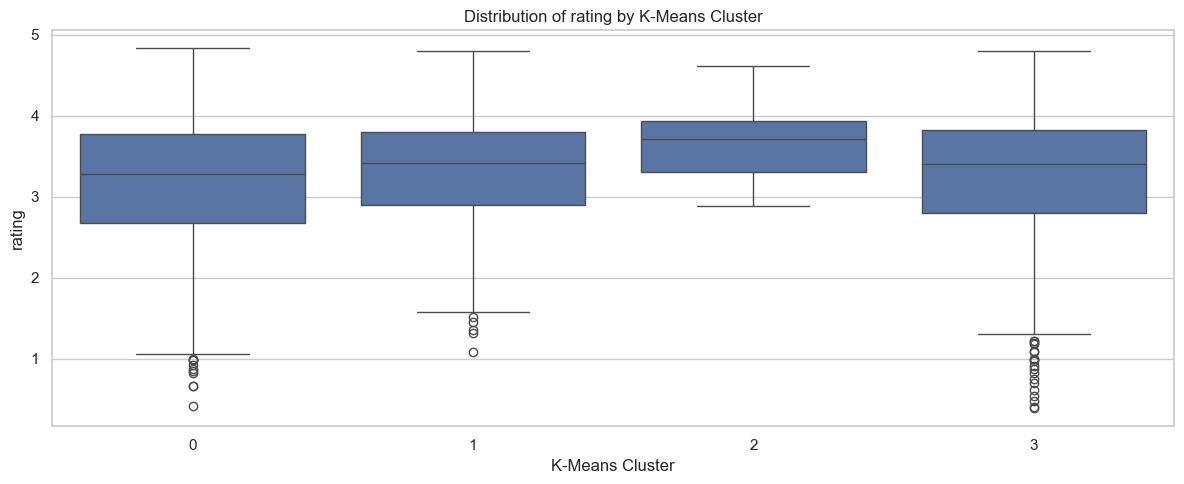

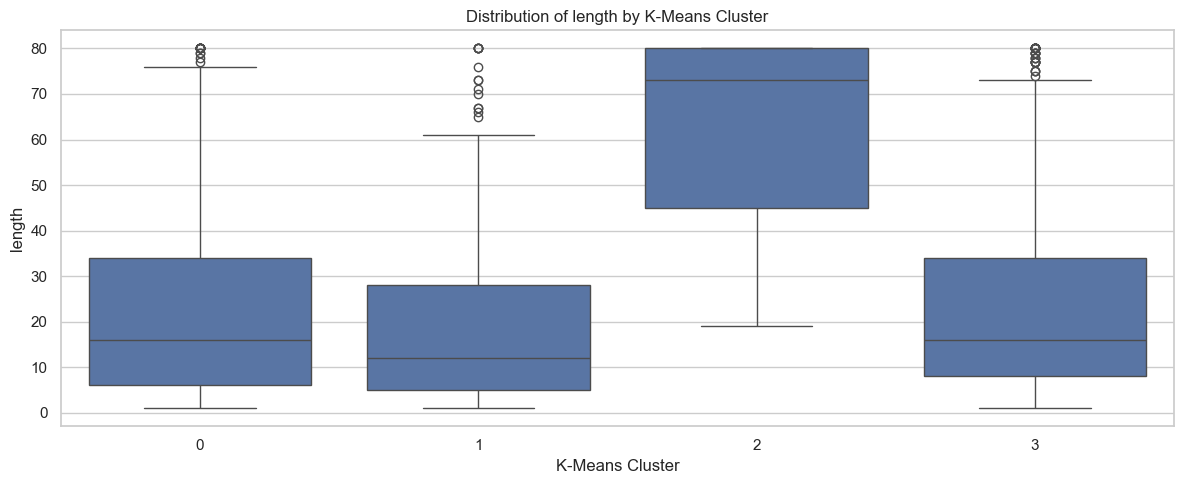

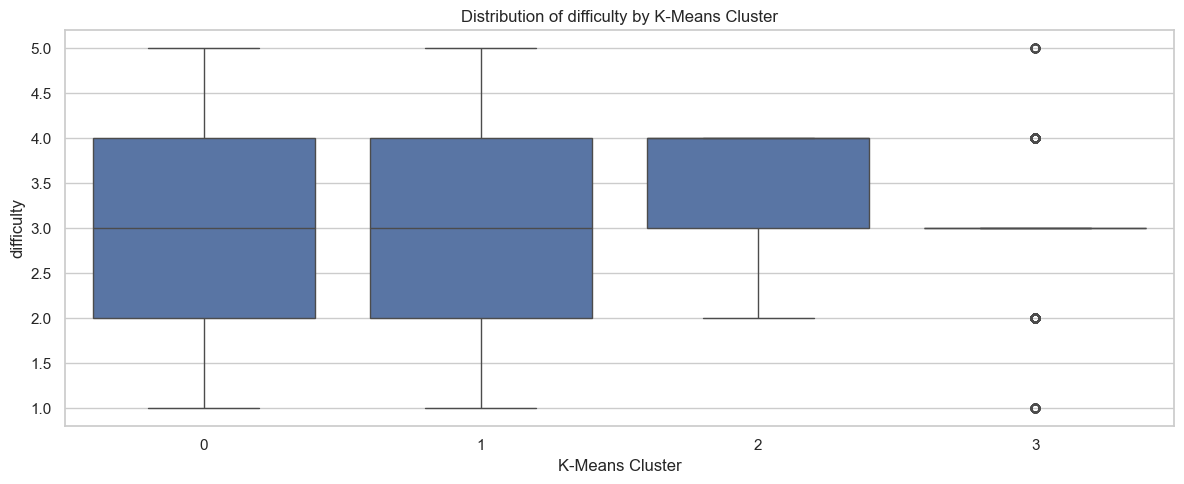

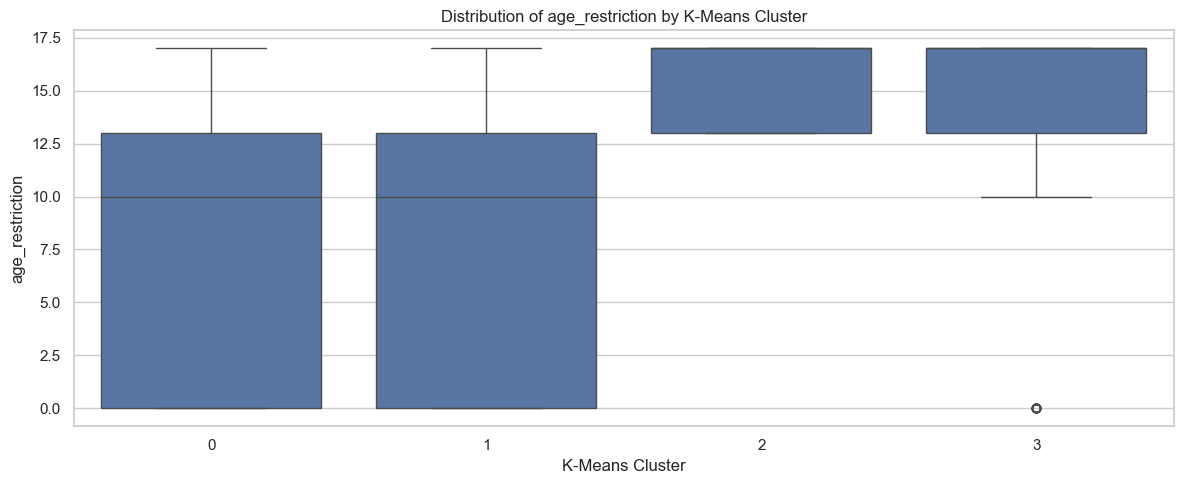

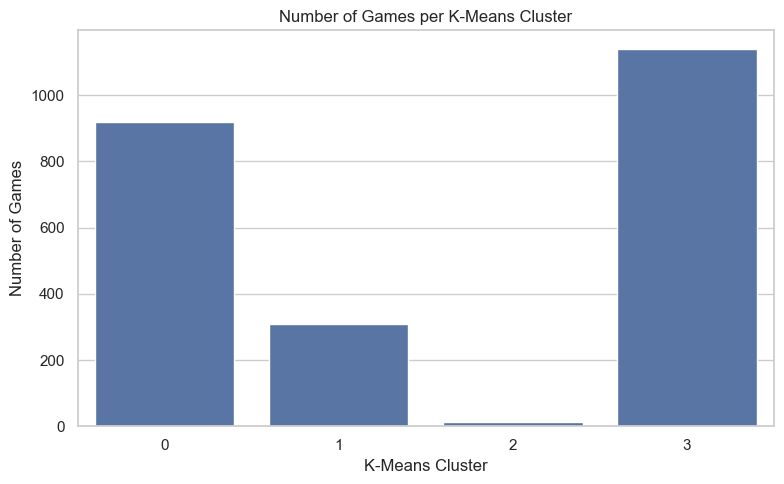

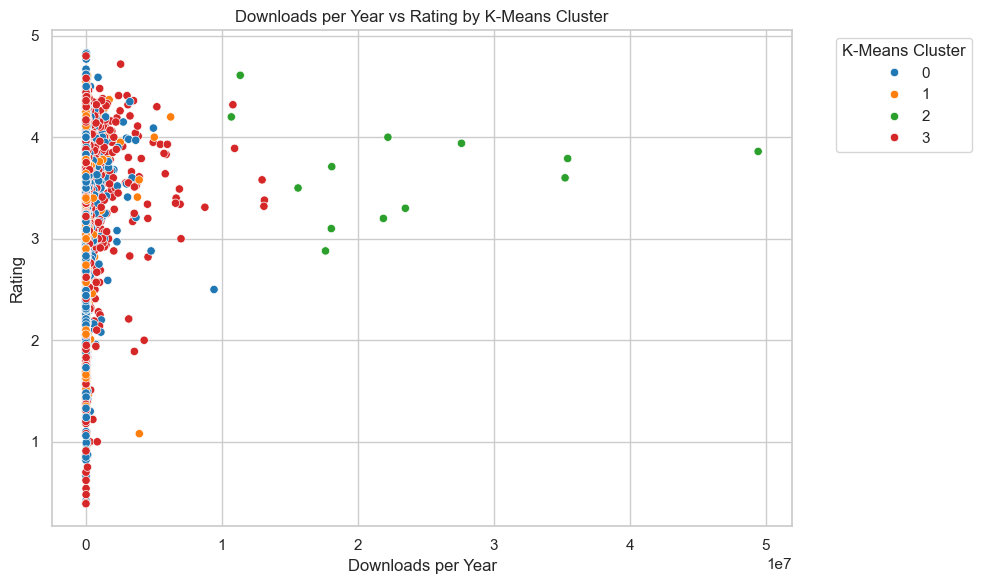

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of key features for each K-Means cluster
numeric_features = ['price', 'game_age', 'review_ratio', 'downloads_per_year', 'rating', 'length', 'difficulty', 'age_restriction']

# Boxplots for each feature by K-Means cluster
for feature in numeric_features:
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df_copy, x='cluster', y=feature)
    plt.title(f'Distribution of {feature} by K-Means Cluster')
    plt.xlabel('K-Means Cluster')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

# Countplot: Number of games per K-Means cluster
plt.figure(figsize=(8, 5))
sns.countplot(data=df_copy, x='cluster', order=sorted(df_copy['cluster'].unique()))
plt.title('Number of Games per K-Means Cluster')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()

# Scatter plot: downloads_per_year vs rating, colored by K-Means cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_copy,
    x='downloads_per_year', y='rating', hue='cluster', palette='tab10', legend='full'
)
plt.title('Downloads per Year vs Rating by K-Means Cluster')
plt.xlabel('Downloads per Year')
plt.ylabel('Rating')
plt.legend(title='K-Means Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Average Values Per Each Cluster

In [143]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'center')

# Calculate mean values for each cluster
cluster_means = df_copy.groupby('cluster').agg({
    'game_age': 'mean',
    'price': 'mean',
    'review_ratio': 'mean',
    'length': 'mean',
    'difficulty': 'mean',
    'downloads_per_year': 'mean'
})

# Calculate the count of records per cluster
cluster_counts = df_copy['cluster'].value_counts().sort_index().rename('record_count')

# Merge the counts into the cluster_means DataFrame
cluster_means = cluster_means.merge(cluster_counts, left_index=True, right_index=True)


from collections import Counter

def top_tags(series, n=5):
    tags = series.str.split(', ').explode()
    most_common = Counter(tags).most_common(n)
    # Use ', ' for separation as requested by previous output format
    return ', '.join([f"{tag} ({count})" for tag, count in most_common])

cluster_means['top_user_defined_tags'] = (
    df_copy.groupby('cluster')['user_defined_tags']
    .apply(lambda x: top_tags(x, n=5))
)

display(cluster_means.reset_index())


,cluster,game_age,price,review_ratio,length,difficulty,downloads_per_year,record_count,top_user_defined_tags
0,0,3.42,9.79,"1,447,178.93",22.95,2.80,"236,407.49",920,"Simulation (653), Strategy (261), Management (172), Building (143), Adventure (116)"
1,1,4.72,6.74,"1,910,146.90",19.11,2.76,"218,764.14",308,"2D (308), Action (96), Adventure (65), Platformer (58), RPG (56)"
2,2,4.00,27.69,"114,125,145.77",60.69,3.46,"23,582,596.27",13,"Action (10), FPS (5), Survival (4), RPG (4), Shooter (3)"
3,3,5.55,11.92,"2,692,957.02",23.59,2.94,"452,025.60",1139,"Action (561), Adventure (341), RPG (303), FPS (230), Horror (227)"


## Insight - Final Outcome

**High Performers Show Extreme Outlier Patterns:**
Cluster 2, though the smallest in record count (13 games), includes blockbuster Action, FPS, and Shooter titles with unparalleled review ratios and downloads per year (by an order of magnitude compared to other clusters). These titles are distinguished by high difficulty and length, suggesting that the most financially successful games on Steam can achieve massive engagement within a short time frame when the right combination of action-genre, challenge, and replay value is present.

**Simulation and Strategy Games Form a Solid, Long-Tail Segment:**
Cluster 0, with a large number of records (920), is anchored around Simulation, Strategy, and Management tags. These games tend to be moderately priced and have above-average game lengths but do not top the charts in reviews or downloads per year. This segment highlights a steady, enduring audience for deep, complex games and suggests reliable opportunities for developers focused on intricate gameplay and longevity rather than mass market explosiveness.

**2D and Platformer Genres Appeal to Niche but Viable Audiences:**
Cluster 1, featuring the 2D, Platformer, and Action mix, consists of newer games with lower prices and shorter average length. Despite a moderate downloads/reviews per year metric, this group demonstrates the lasting popularity and market viability of "retro" or indie aesthetics. Developers targeting this segment can compete by emphasizing affordability, accessible play sessions, and visual style.

**The Mainstream Core Remains in Action/Adventure Mix:**
With the largest cluster (1139 games), Cluster 3 is dominated by Action, Adventure, RPG, and Horror. These games reflect broad audience appeal, moderate length/difficulty, and solid but not extreme performance metrics. This cluster represents the mainstream "center" of the PC gaming market, where reliable commercial results are possible through well-polished genre games.

**Market Segmentation Supports Targeted Strategy:**
This cluster-based segmentation underscores that high-performing Steam games do not share a single formula. Instead, success is closely tied to genre, difficulty, price point, and gameplay duration. For development and marketing, these patterns can inform tailored feature sets, pricing recommendations, and platform targeting, ensuring that new releases are positioned competitively within their likely audience segments.